In [1]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)
con <- dbConnect(odbc::odbc(), .connection_string = "DSN=BoxOffice;Trusted_////connection=yes;", 
                 timeout = 10)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}

Loading required package: ggExtra

Warning message:
"package 'ggExtra' was built under R version 3.6.2"
Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.2"
Loading required package: mvoutlier

Warning message:
"package 'mvoutlier' was built under R version 3.6.2"
Loading required package: sgeostat

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

sROC 0.1-2 loaded

Loading required package: MissMech

Loading required package: mice

Warning message:
"package 'mice' was built under R version 3.6.2"
Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


Loading required package: MatchIt

Wa

In [11]:
movies_ff_v <- dbReadTable(con,"movies_ff_v")

In [3]:
load("C:/Users/Guy/Documents/DataScience/Data/movies_ff_v.rdata")

In [4]:
summary(movies_ff_v)


    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
  release_date           runtime      runtime_cat           revenue         
 Min.   :1918-08-01   Min.   :  0.0   Length:7375        Min.   :1.000e+00  
 1st Qu.:1992-11-13   1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06  
 Median :2004-07-29   Median :104.0   Mode  :character   Median :1.693e+07  
 Mean   :2000-03-15   Mean   :107.7                      Mean   :6.688e+07  
 3rd Qu.:2011-06-27   3rd Qu.:1

In [219]:
require(datasets)
movies_ff_vList <- unlist(as.list(movies_ff_v))
movies_ff_vMean <- mean(movies_ff_vList)
symbols <- c("movies_ff_v","movies_ff_vList","movies_ff_vMean")
save(list=symbols,file="C:/Users/Guy/Documents/DataScience/Data/movies_ff_v.rdata")

Warning message in mean.default(movies_ff_vList):
"argument is not numeric or logical: returning NA"


In [207]:
install.packages("pastecs")
library(pastecs)
options(scipen=100)
options(digits=2)
stat.desc(movies_ff_v[,2:85], basic=TRUE, desc=TRUE, norm=FALSE, p=0.95)

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Guy\AppData\Local\Temp\RtmpOAvxlc\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 3.6.2"

Attaching package: 'pastecs'


The following objects are masked from 'package:dplyr':

    first, last




,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,sw_has_poster,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,7375.0,NA,7375.000000,7374.00,7370.00,NA,2993.0,7375.0000,7375.0000,7375.00000,...,7341.0000,7341.0000,7341.0000,7341.0000,7341.0000,7341.00000,7341.000,7341.0000,7341.0000,7341.0000
nbr.null,2012.0,NA,0.000000,1.00,19.00,NA,0.0,1039.0000,5012.0000,2.00000,...,7194.0000,6971.0000,5293.0000,6297.0000,6516.0000,7336.00000,3872.000,6840.0000,7281.0000,6578.0000
nbr.na,0.0,NA,0.000000,1.00,5.00,NA,4382.0,0.0000,0.0000,0.00000,...,34.0000,34.0000,34.0000,34.0000,34.0000,34.00000,34.000,34.0000,34.0000,34.0000
min,0.0,NA,0.000001,-18781.00,0.00,NA,1.0,0.0000,0.0000,0.00000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.000,0.0000,0.0000,0.0000
max,380000000.0,NA,547.488298,17389.00,338.00,NA,1519557910.0,1.0000,1.0000,1.00000,...,3.0000,10.0000,6.0000,4.0000,5.0000,1.00000,12.000,6.0000,2.0000,5.0000
range,380000000.0,NA,547.488297,36170.00,338.00,NA,1519557909.0,1.0000,1.0000,1.00000,...,3.0000,10.0000,6.0000,4.0000,5.0000,1.00000,12.000,6.0000,2.0000,5.0000
sum,167166594664.0,NA,62980.853408,81343960.00,794097.00,NA,200169779760.0,6336.0000,2363.0000,7373.00000,...,150.0000,473.0000,2595.0000,1127.0000,893.0000,5.00000,6898.000,581.0000,62.0000,912.0000
median,8000000.0,NA,7.455875,12628.00,104.00,NA,16928137.0,1.0000,0.0000,1.00000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.000,0.0000,0.0000,0.0000
mean,22666656.9,NA,8.539777,11031.19,107.75,NA,66879311.6,0.8591,0.3204,0.99973,...,0.0204,0.0644,0.3535,0.1535,0.1216,0.00068,0.940,0.0791,0.0084,0.1242


In [196]:
vn=names(movies_ff_v)
vn
movies_ff_v[vn[1]]


[1] "movie_id"                     "budget"                      
 [3] "original_language"            "popularity"                  
 [5] "release_date"                 "runtime"                     
 [7] "runtime_cat"                  "revenue"                     
 [9] "sw_lang_en"                   "sw_web_presence"             
[11] "sw_has_poster"                "sw_tagline"                  
[13] "keyword_cnt"                  "release_year"                
[15] "release_month"                "high_release_month"          
[17] "release_day"                  "seasonality"                 
[19] "sw_collection"                "producers_cnt"               
[21] "countries_cnt"                "lang_US"                     
[23] "lang_FR"                      "lang_RU"                     
[25] "lang_ES"                      "lang_JA"                     
[27] "keywords_cnt"                 "actor0_movies_cnt"           
[29] "actor0_movies_5y_cnt"         "actor1_movies_cnt"           
[31] "actor1_movies_5y_cnt"         "actor2_movies_cnt"           
[33] "actor2_movies_5y_cnt"         "sw_female_actor0"            
[35] "sw_female_actor1"             "sw_female_actor2"            
[37] "sw_male_actor0"               "sw_male_actor1"              
[39] "sw_male_actor2"               "actor0_prev_revenue"         
[41] "actor1_prev_revenue"          "actor2_prev_revenue"         
[43] "director_movies_cnt"          "director_movies_5y_cnt"      
[45] "genre_adventure"              "genre_fantasy"               
[47] "genre_animation"              "genre_drama"                 
[49] "genre_horror"                 "genre_action"                
[51] "genre_comedy"                 "genre_history"               
[53] "genre_western"                "genre_thriller"              
[55] "genre_crime"                  "genre_documentary"           
[57] "genre_science_fiction"        "genre_mystery"               
[59] "genre_music"                  "genre_romance"               
[61] "genre_family"                 "genre_war"                   
[63] "genre_foreign"                "depart_Art"                  
[65] "depart_Camera"                "depart_Crew"                 
[67] "depart_Custom_Mkup"           "depart_Directing"            
[69] "depart_Editing"               "depart_Lighting"             
[71] "depart_Production"            "depart_Sound"                
[73] "depart_Visual_Effects"        "depart_Writing"              
[75] "depart_Art_female"            "depart_Camera_female"        
[77] "depart_Crew_female"           "depart_Custom_Mkup_female"   
[79] "depart_Directing_female"      "depart_Editing_female"       
[81] "depart_Lighting_female"       "depart_Production_female"    
[83] "depart_Sound_female"          "depart_Visual_Effects_female"
[85] "depart_Writing_female"

movie_id
<int>
1
2
3
4
5
6
7
8
9


In [198]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(movies_ff_v[,2:ncol(movies_ff_v)])) {
    if (is.numeric(movies_ff_v[[v]])
       { hist(movies_ff_v[v]) 
    else 
         barplot(table(movies_ff_v[v])) }
}


ERROR: Error in parse(text = x, srcfile = src): <text>:5:8: unexpected '{'
4:     if (is.numeric(movies_ff_v[[v]])
5:        {
          ^


In [68]:
vn <- names(movies_ff_v[,2:85])
l <- c('movie_id')
for(v in vn) {
        if(is.numeric(movies_ff_v[[v]])) 
            {l <- c(l,v)}}
    

In [71]:
l
length(l)

[1] "movie_id"                     "budget"                      
 [3] "popularity"                   "runtime"                     
 [5] "revenue"                      "sw_lang_en"                  
 [7] "sw_web_presence"              "sw_has_poster"               
 [9] "sw_tagline"                   "keyword_cnt"                 
[11] "release_year"                 "release_month"               
[13] "high_release_month"           "release_day"                 
[15] "seasonality"                  "sw_collection"               
[17] "producers_cnt"                "countries_cnt"               
[19] "lang_US"                      "lang_FR"                     
[21] "lang_RU"                      "lang_ES"                     
[23] "lang_JA"                      "keywords_cnt"                
[25] "actor0_movies_cnt"            "actor0_movies_5y_cnt"        
[27] "actor1_movies_cnt"            "actor1_movies_5y_cnt"        
[29] "actor2_movies_cnt"            "actor2_movies_5y_cnt"        
[31] "sw_female_actor0"             "sw_female_actor1"            
[33] "sw_female_actor2"             "sw_male_actor0"              
[35] "sw_male_actor1"               "sw_male_actor2"              
[37] "actor0_prev_revenue"          "actor1_prev_revenue"         
[39] "actor2_prev_revenue"          "director_movies_cnt"         
[41] "director_movies_5y_cnt"       "genre_adventure"             
[43] "genre_fantasy"                "genre_animation"             
[45] "genre_drama"                  "genre_horror"                
[47] "genre_action"                 "genre_comedy"                
[49] "genre_history"                "genre_western"               
[51] "genre_thriller"               "genre_crime"                 
[53] "genre_documentary"            "genre_science_fiction"       
[55] "genre_mystery"                "genre_music"                 
[57] "genre_romance"                "genre_family"                
[59] "genre_war"                    "genre_foreign"               
[61] "depart_Art"                   "depart_Camera"               
[63] "depart_Crew"                  "depart_Custom_Mkup"          
[65] "depart_Directing"             "depart_Editing"              
[67] "depart_Lighting"              "depart_Production"           
[69] "depart_Sound"                 "depart_Visual_Effects"       
[71] "depart_Writing"               "depart_Art_female"           
[73] "depart_Camera_female"         "depart_Crew_female"          
[75] "depart_Custom_Mkup_female"    "depart_Directing_female"     
[77] "depart_Editing_female"        "depart_Lighting_female"      
[79] "depart_Production_female"     "depart_Sound_female"         
[81] "depart_Visual_Effects_female" "depart_Writing_female"

[1] 82

In [53]:
c('a')

[1] "a"

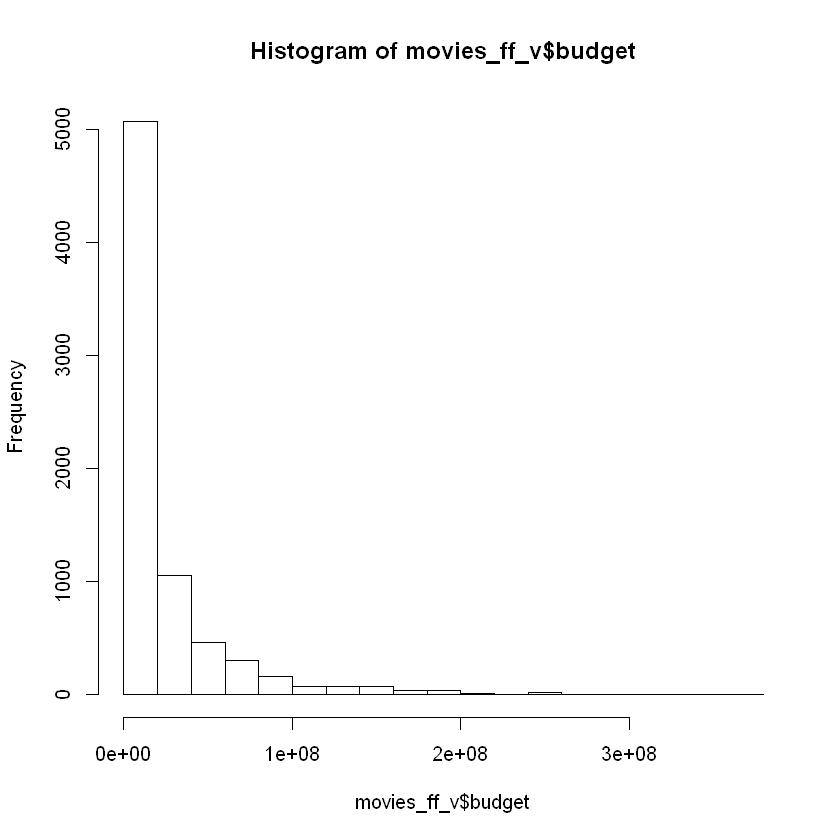

In [54]:
hist(movies_ff_v$budget)

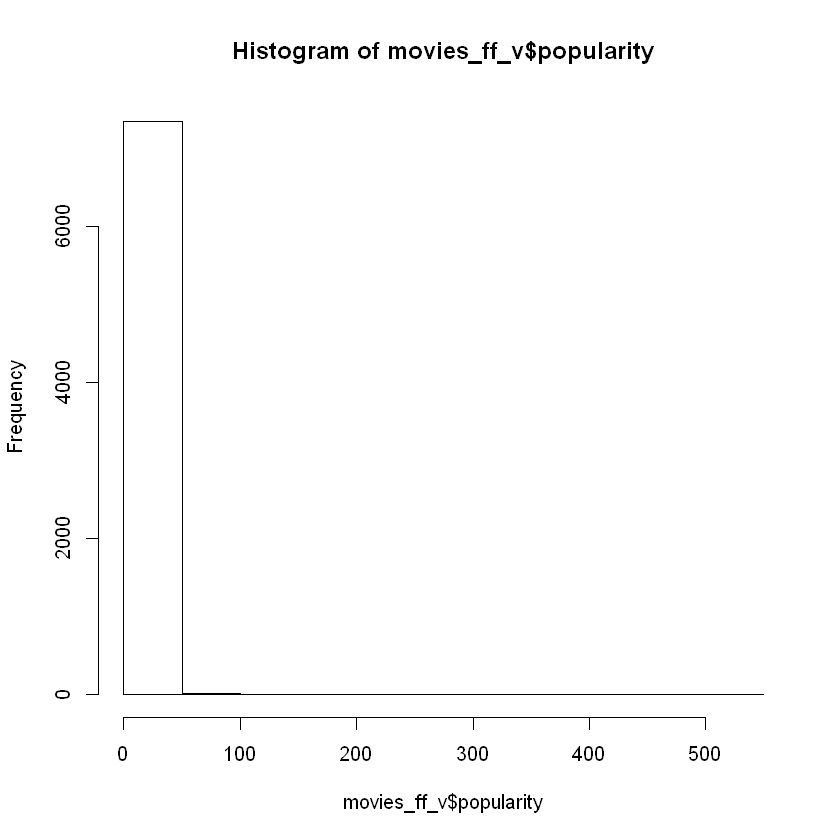

In [23]:
hist(movies_ff_v$popularity)

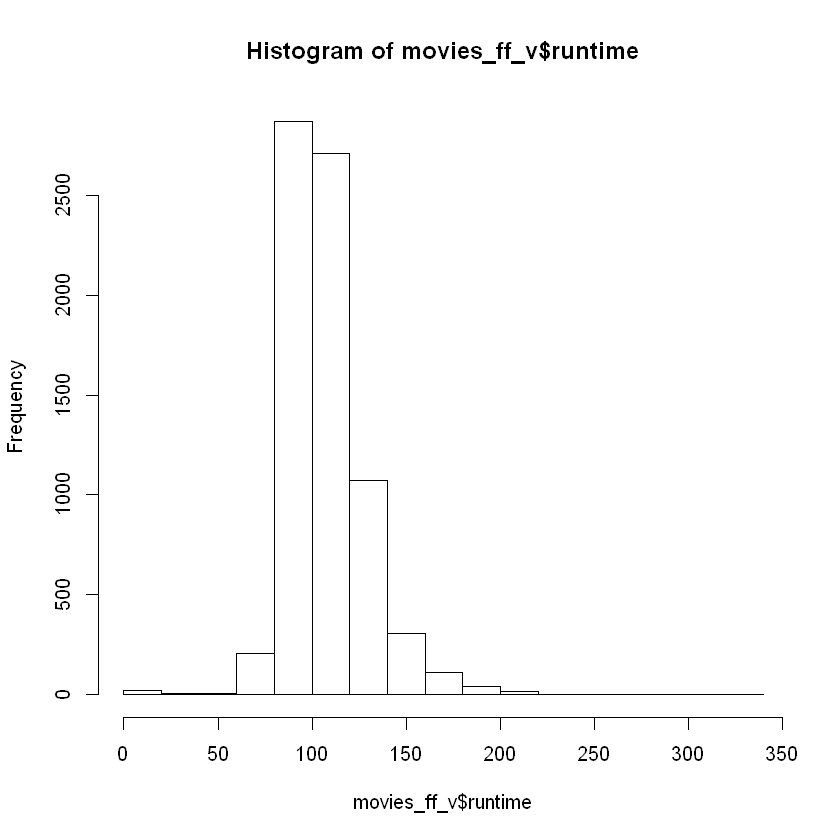

In [24]:
hist(movies_ff_v$runtime)

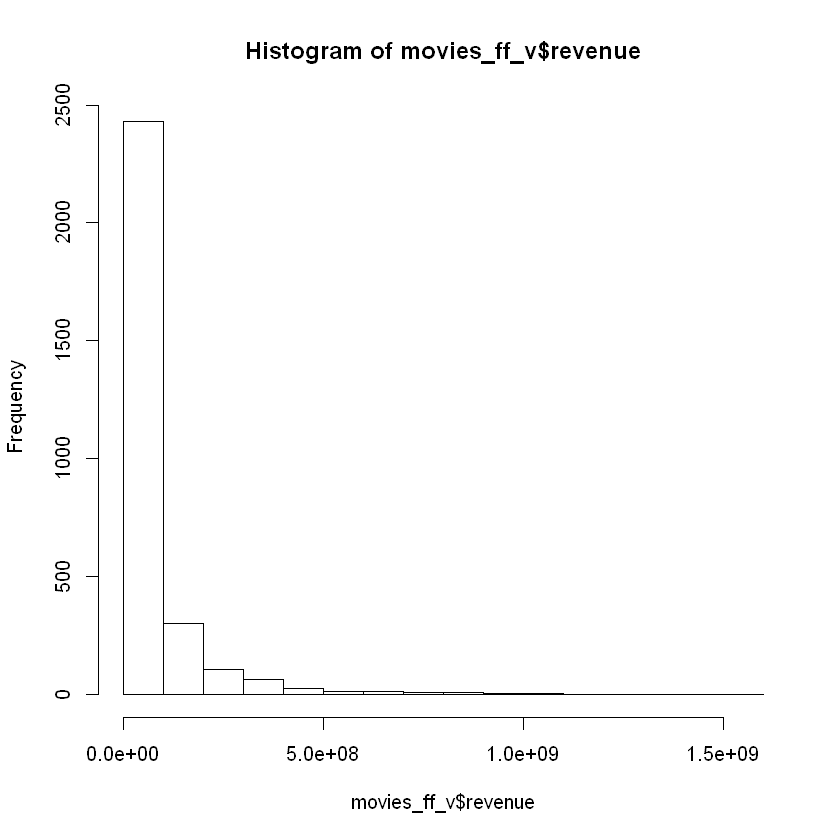

In [25]:
hist(movies_ff_v$revenue)

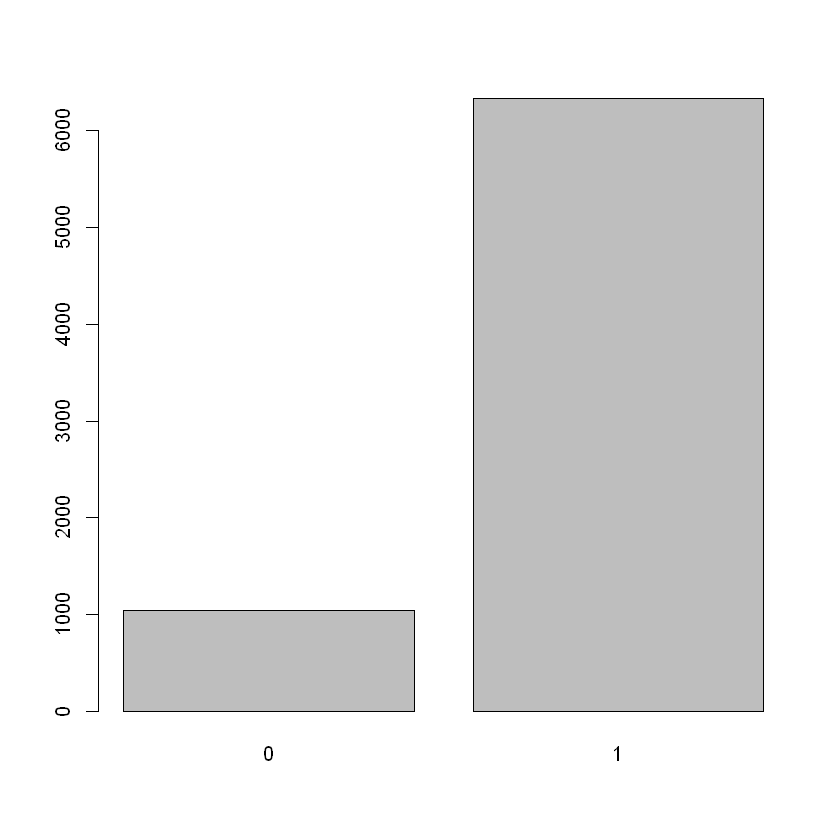

In [72]:
barplot(table(movies_ff_v$sw_lang_en))

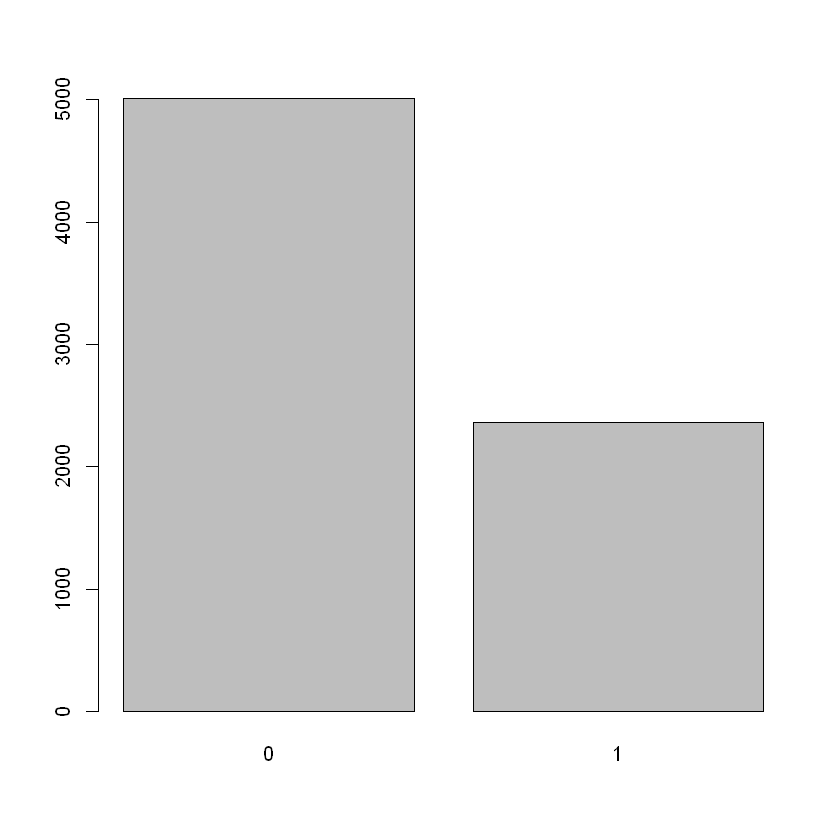

In [71]:
barplot(table(movies_ff_v$sw_web_presence))

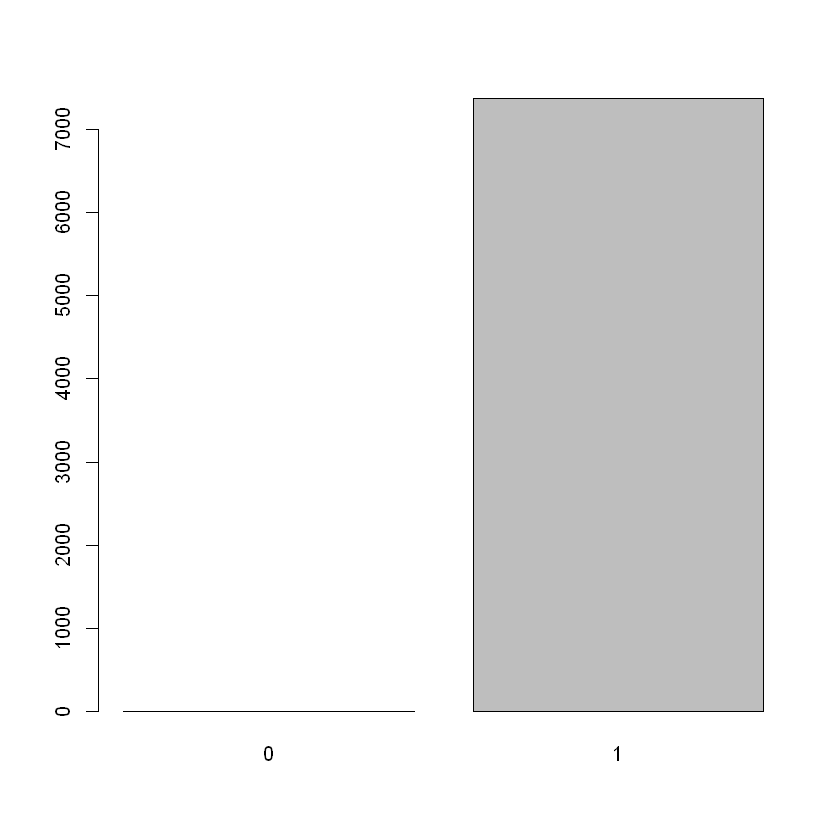

In [70]:
barplot(table(movies_ff_v$sw_has_poster))

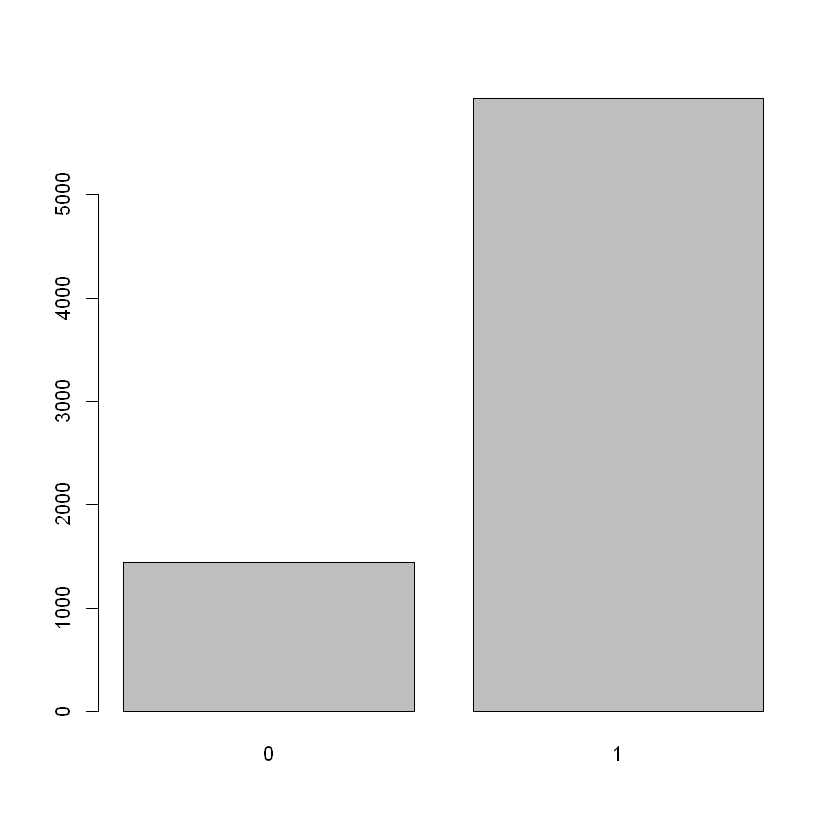

In [69]:
barplot(table(movies_ff_v$sw_tagline))

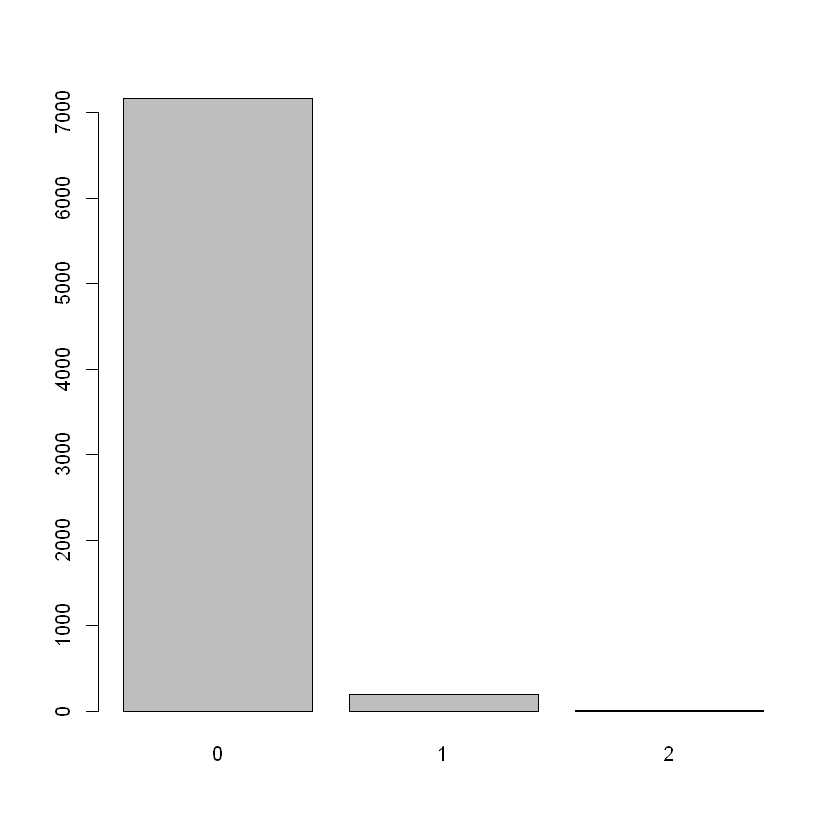

In [68]:
barplot(table(movies_ff_v$sw_collection))

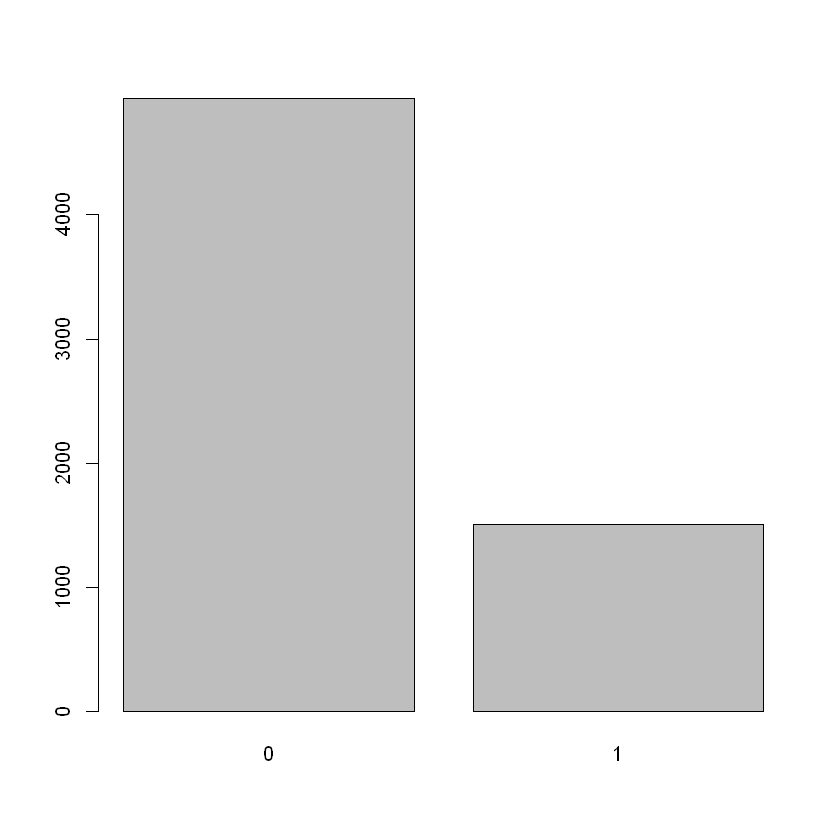

In [67]:
barplot(table(movies_ff_v$sw_female_actor0))

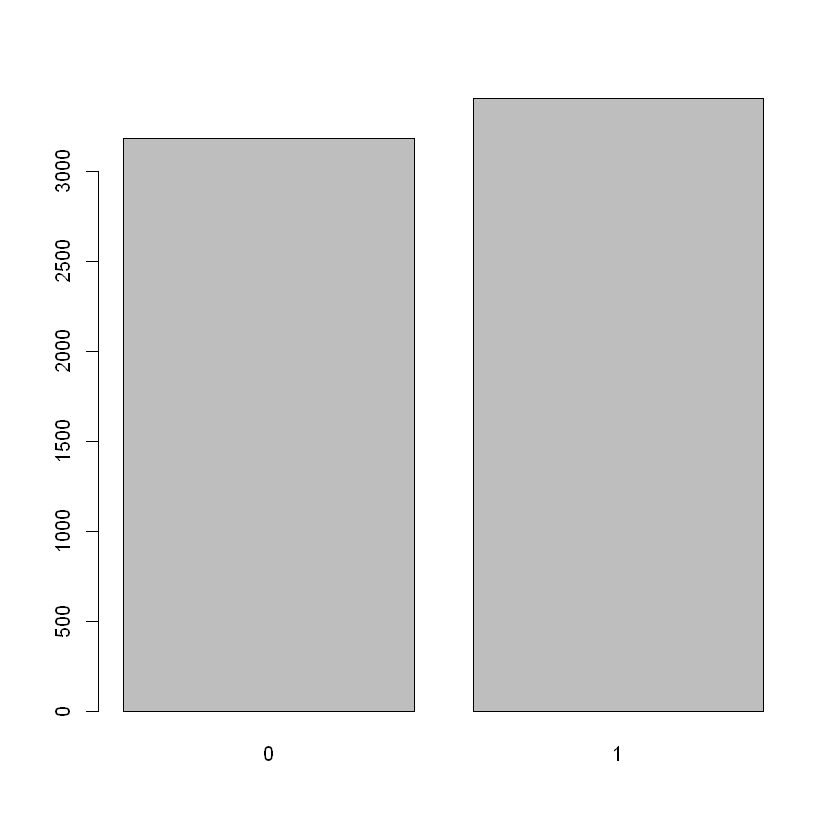

In [66]:
barplot(table(movies_ff_v$sw_male_actor1))

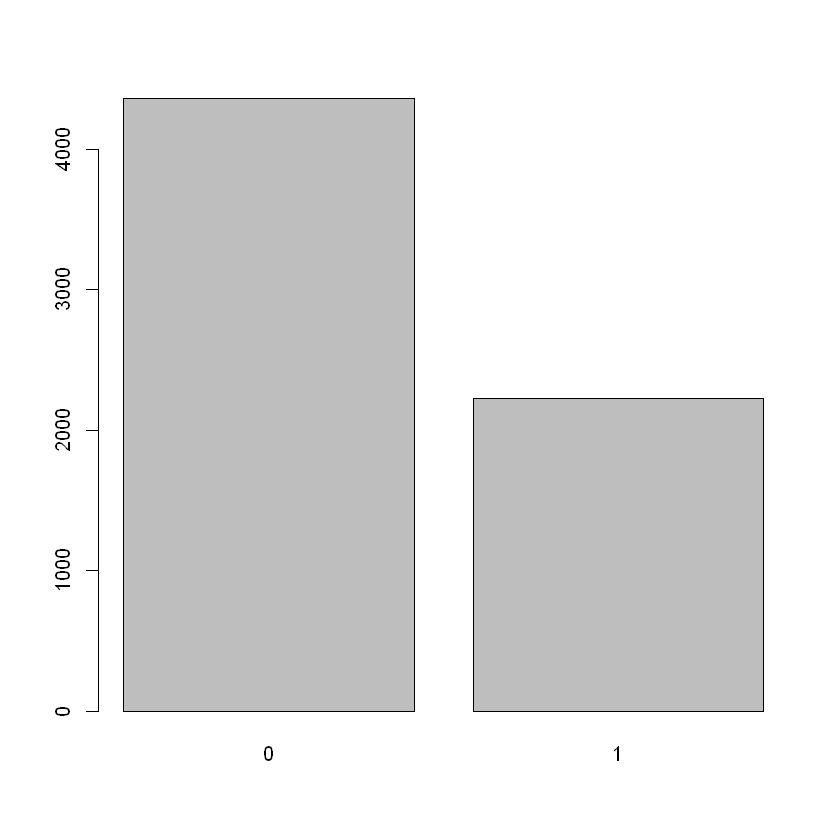

In [65]:
barplot(table(movies_ff_v$sw_female_actor2))

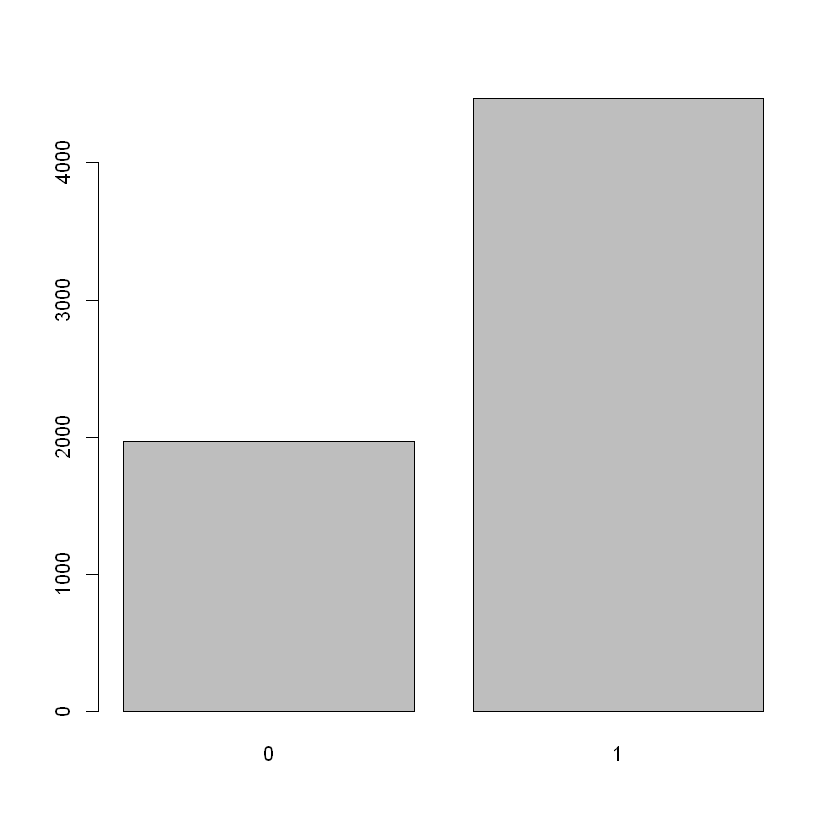

In [64]:
barplot(table(movies_ff_v$sw_male_actor0))

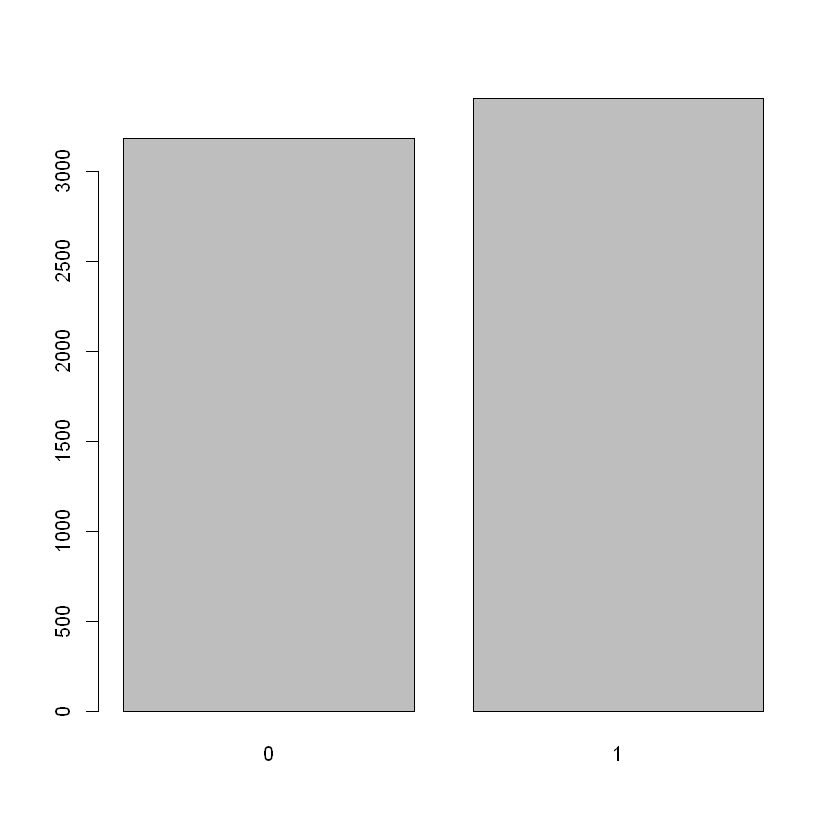

In [63]:
barplot(table(movies_ff_v$sw_male_actor1))

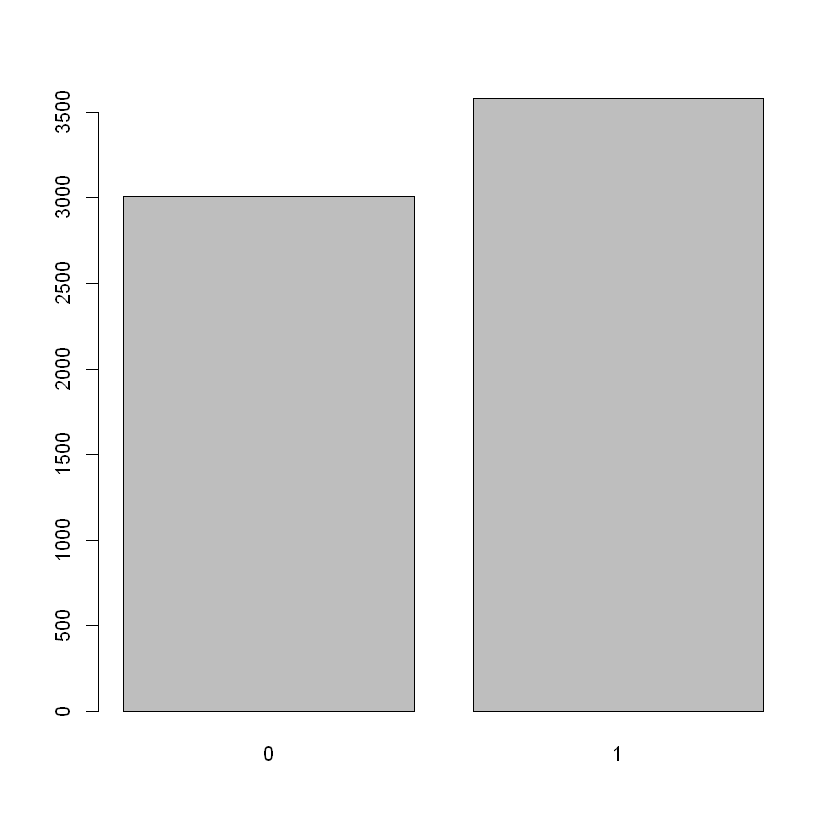

In [62]:
barplot(table(movies_ff_v$sw_male_actor2))

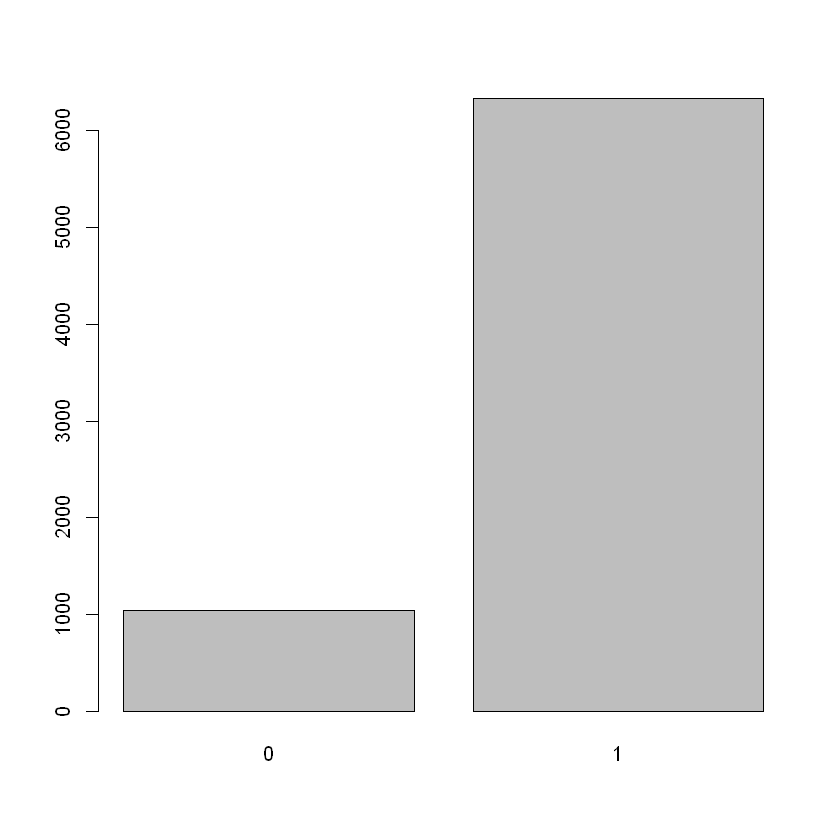

In [61]:
barplot(table(movies_ff_v$sw_lang_en))

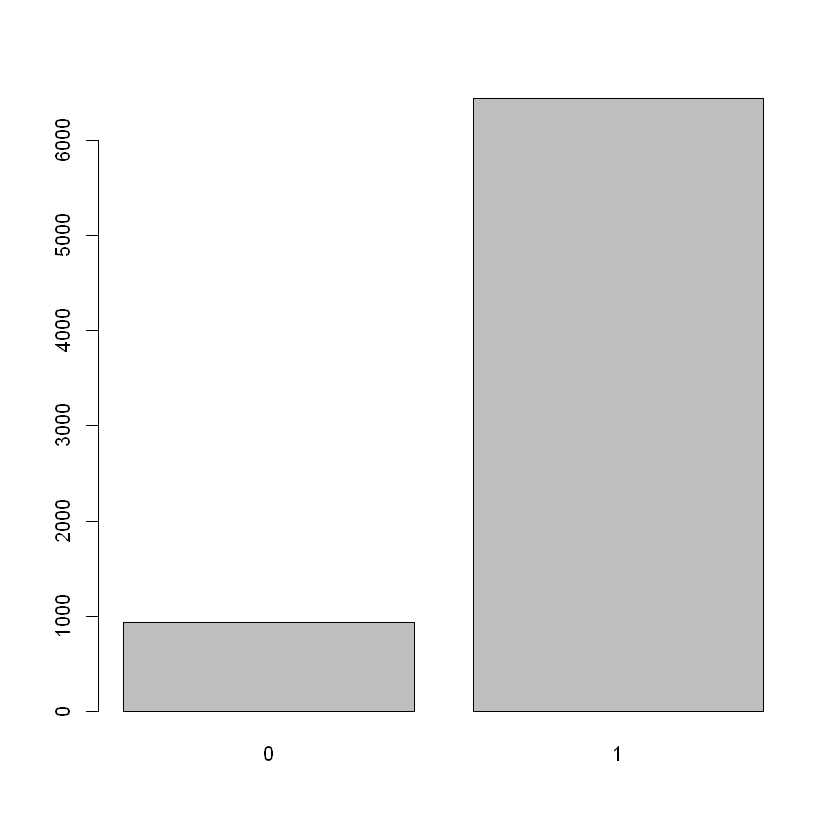

In [60]:
barplot(table(movies_ff_v$lang_US))

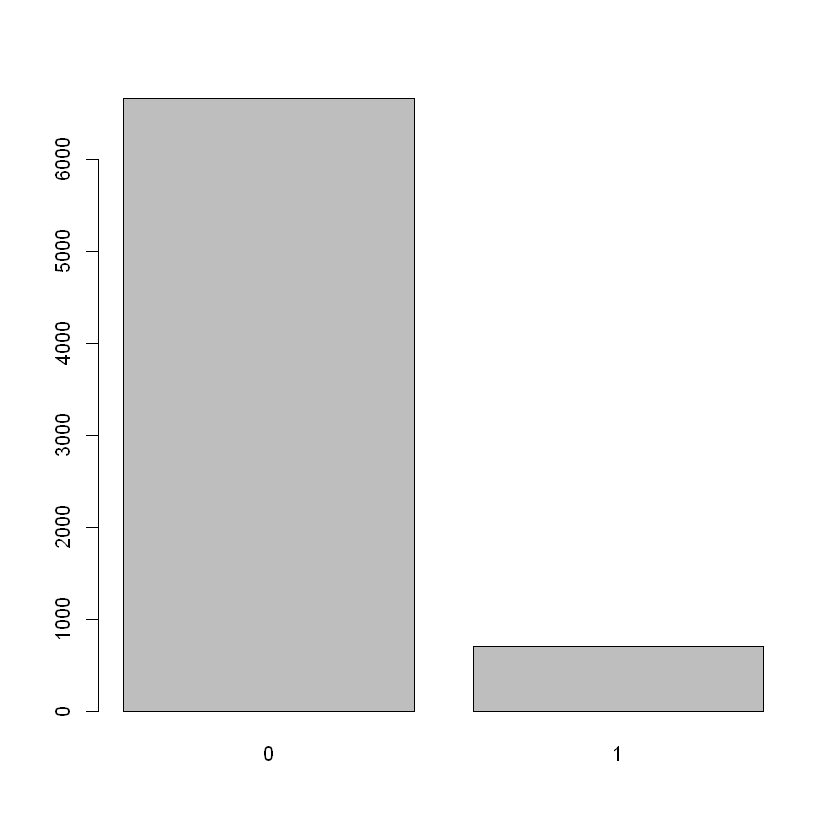

In [59]:
barplot(table(movies_ff_v$lang_FR))

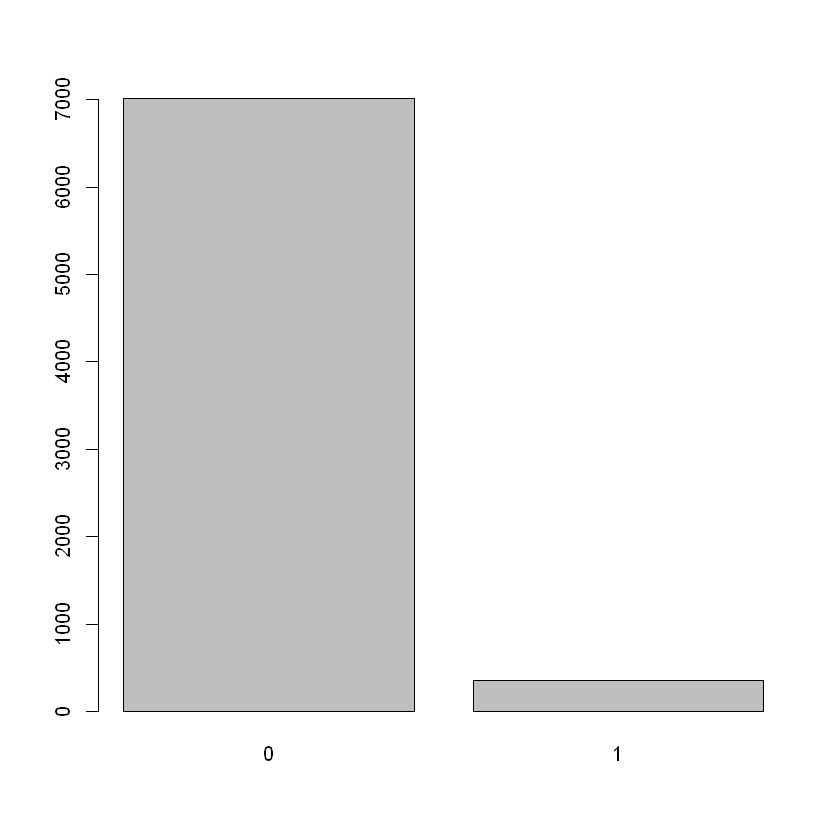

In [58]:
barplot(table(movies_ff_v$lang_RU))

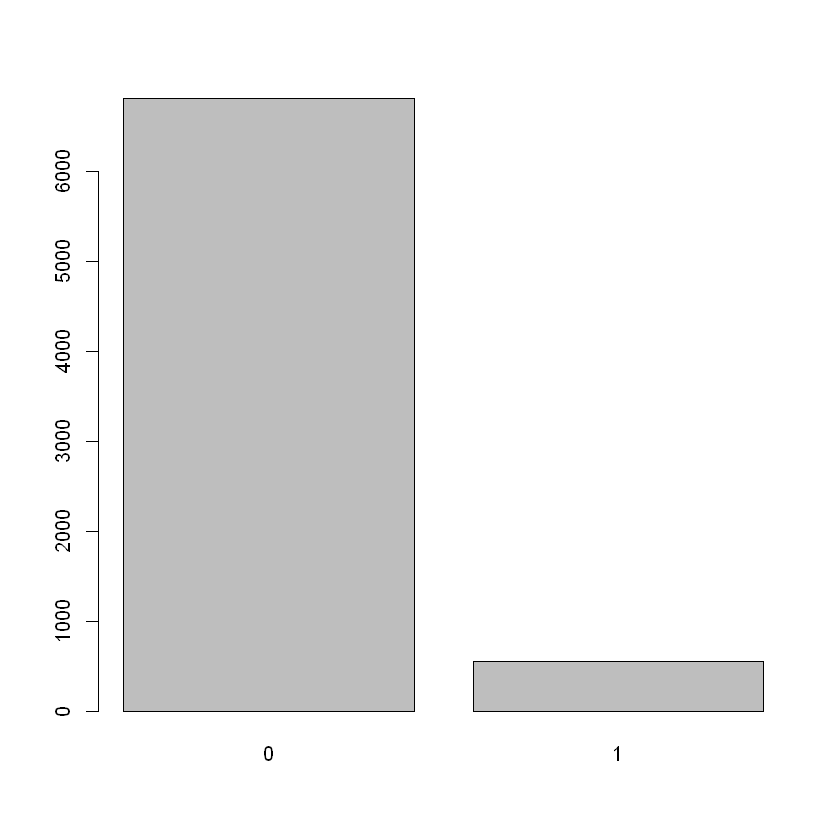

In [57]:
barplot(table(movies_ff_v$lang_ES))

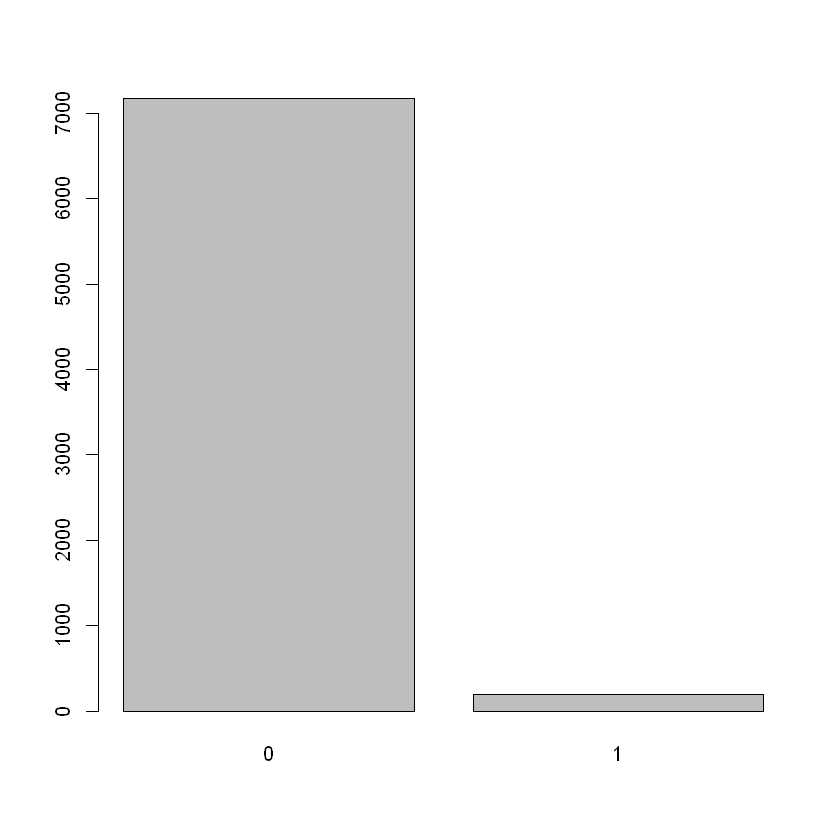

In [56]:
barplot(table(movies_ff_v$lang_JA))

In [45]:
table(movies_ff_v$runtime_cat)


 Large Medium  Short 
  1769   3884   1722 

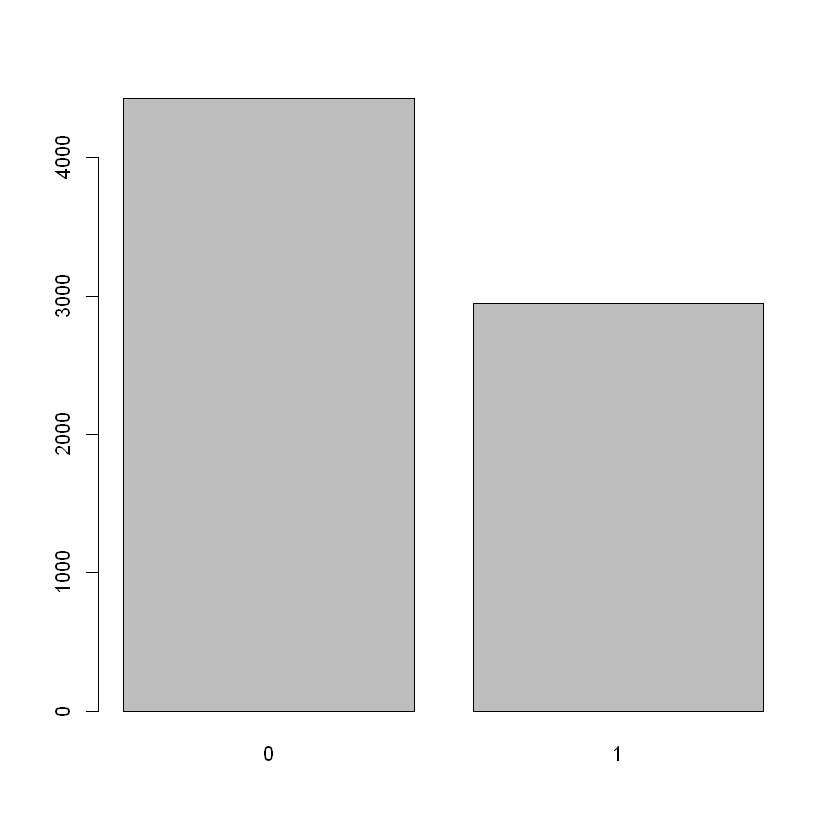

In [55]:
barplot(table(movies_ff_v$high_release_month))

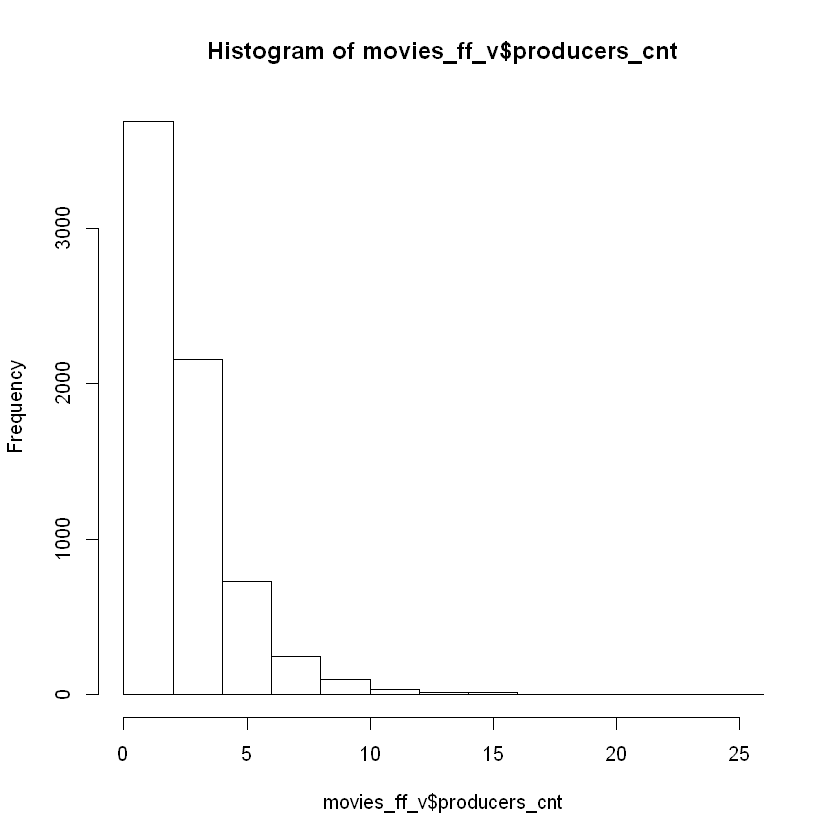

In [47]:
hist(movies_ff_v$producers_cnt)

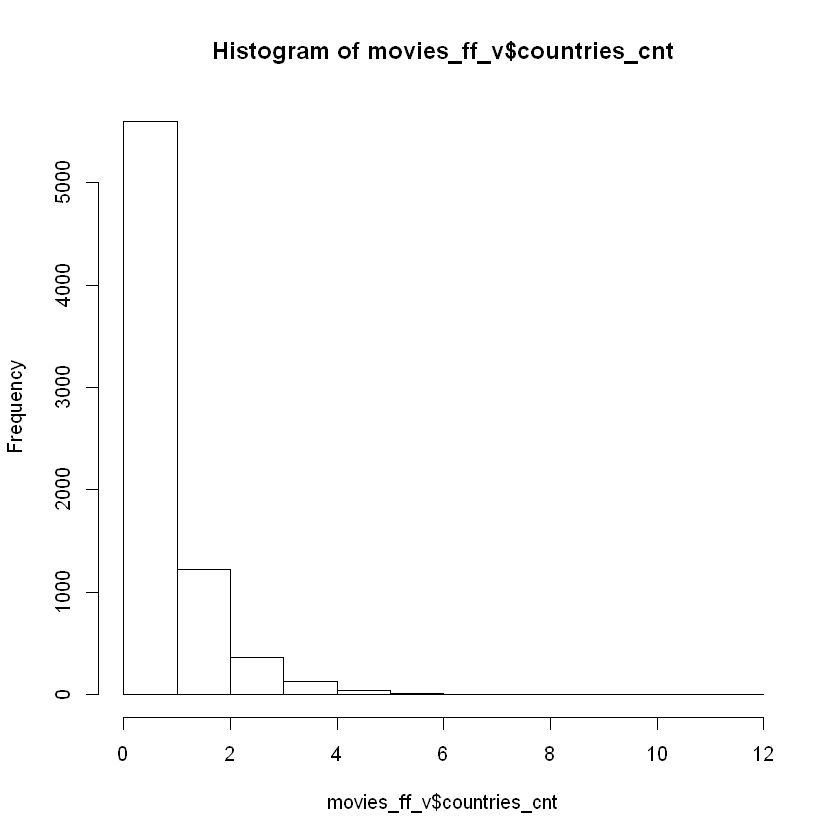

In [48]:
hist(movies_ff_v$countries_cnt)

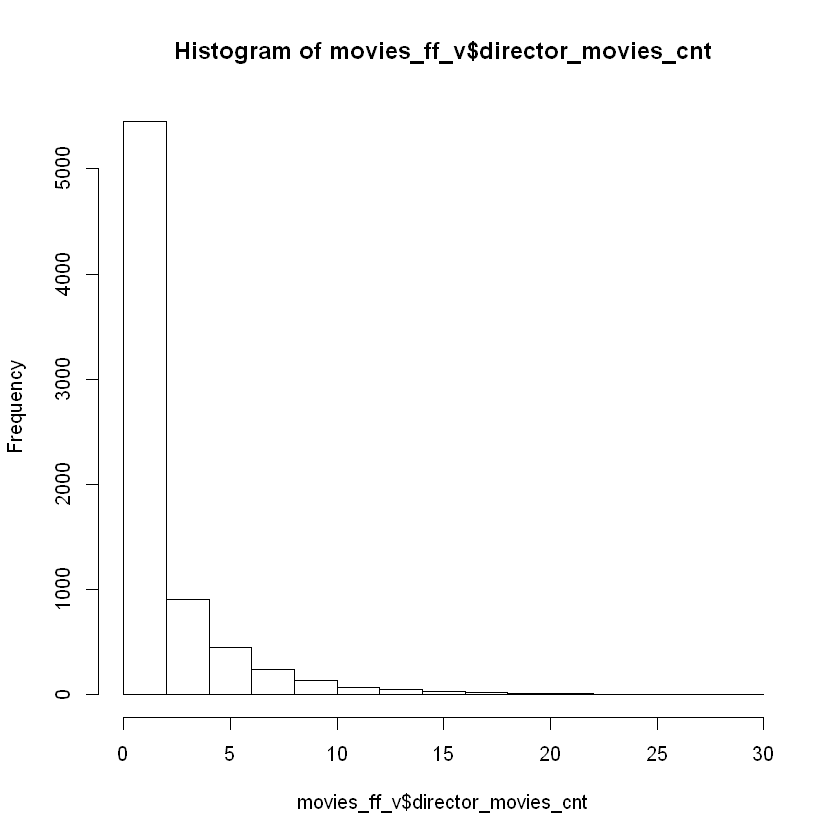

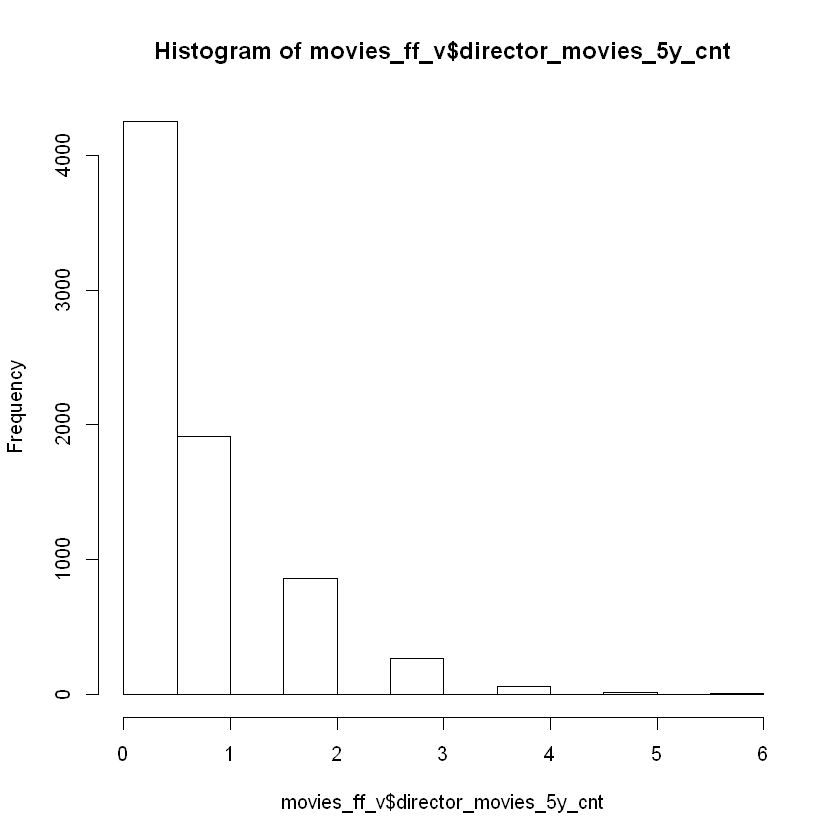

In [49]:
hist(movies_ff_v$director_movies_cnt)
hist(movies_ff_v$director_movies_5y_cnt)

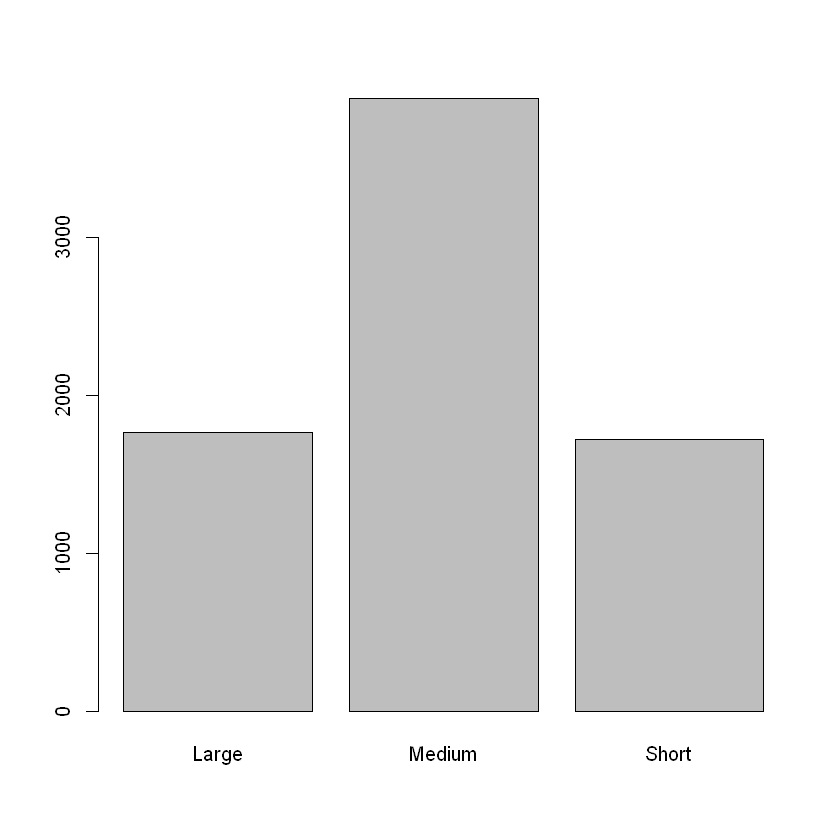

In [52]:
barplot(table(movies_ff_v$runtime_cat))



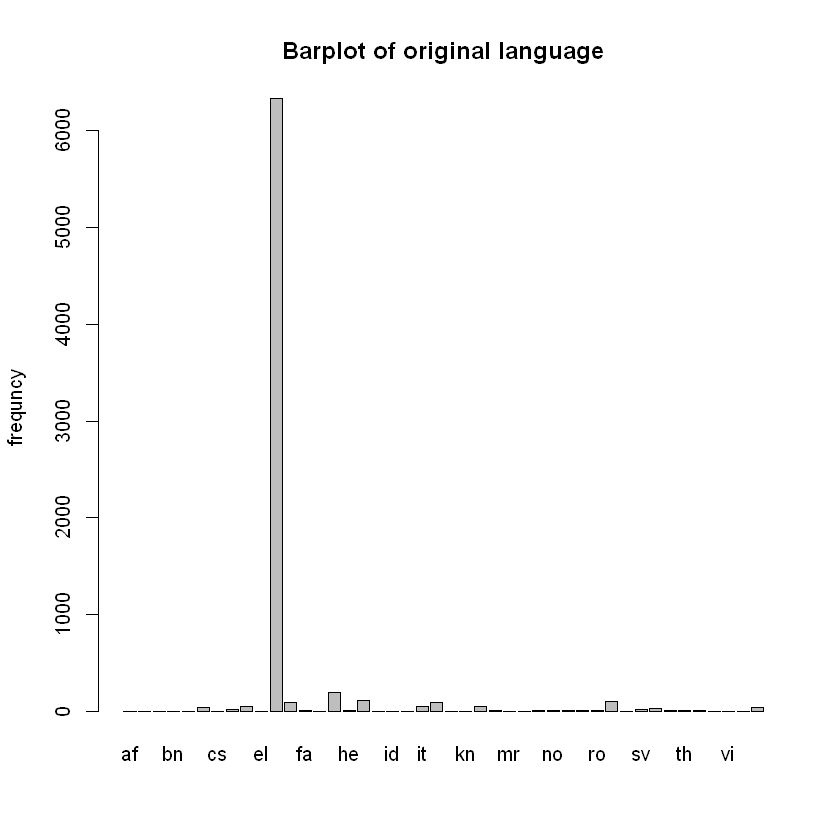

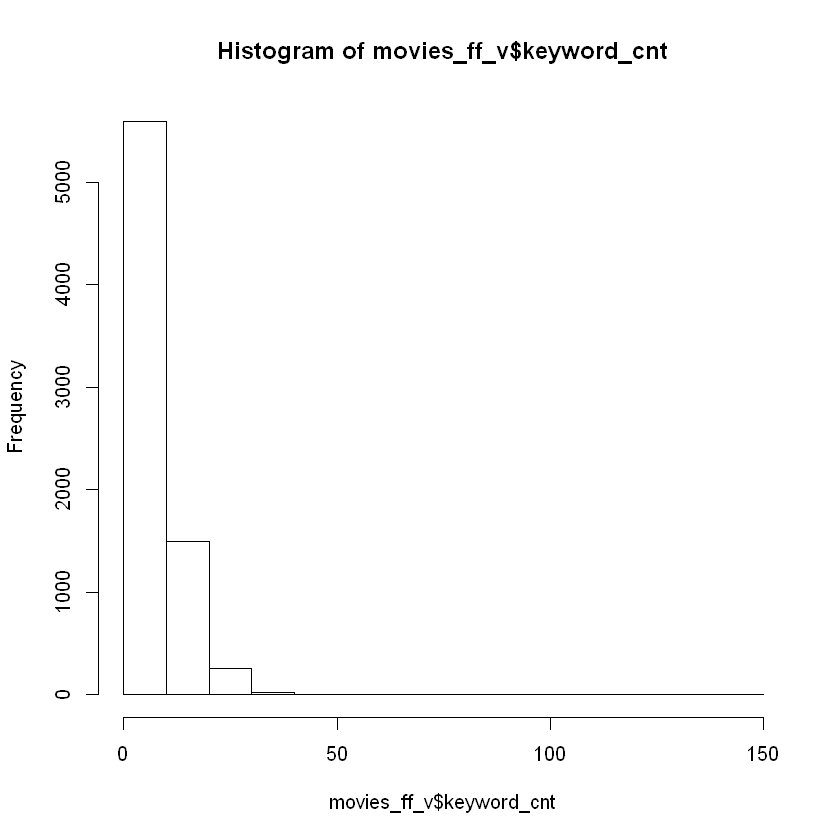

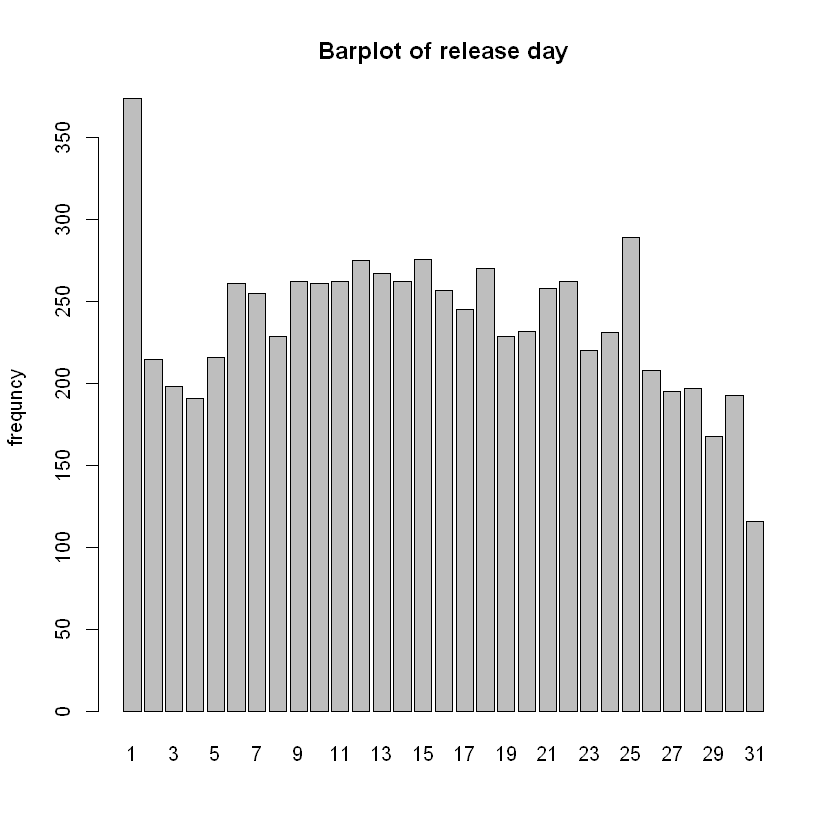

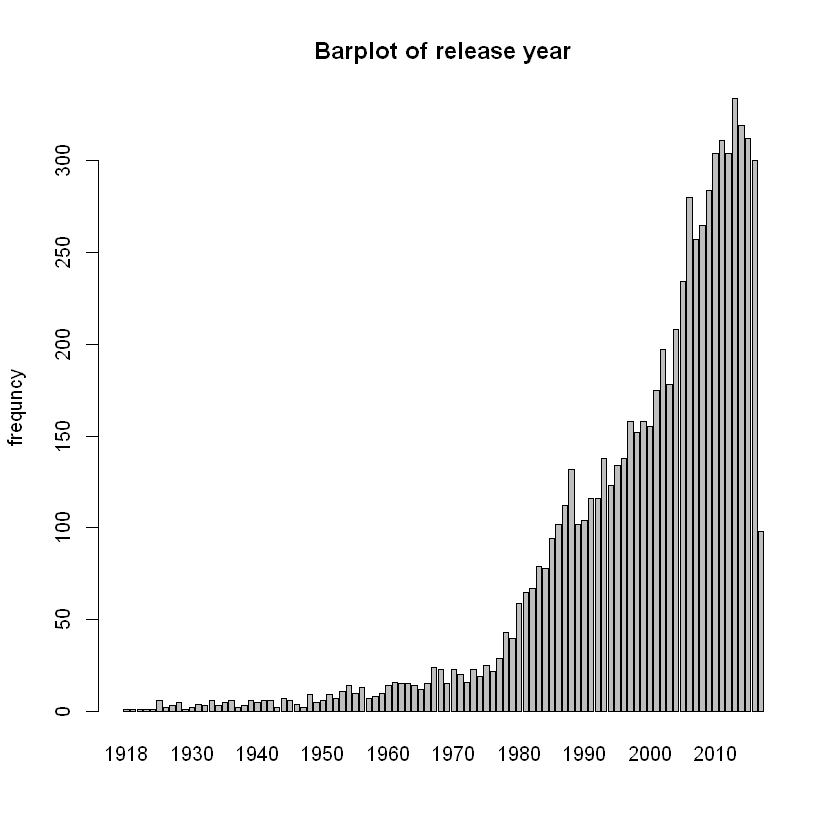

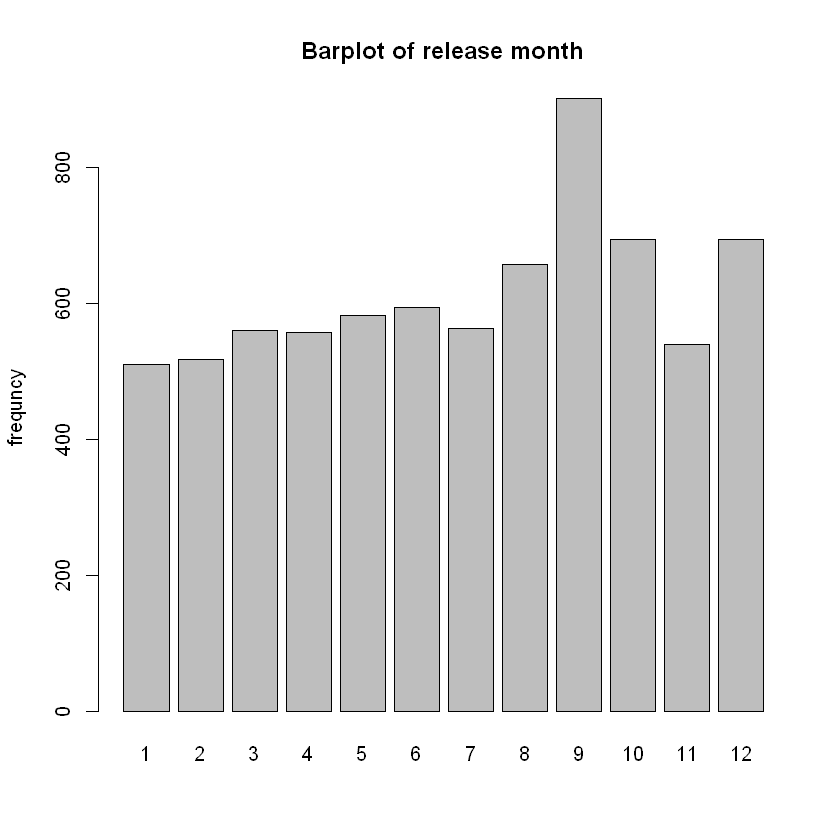

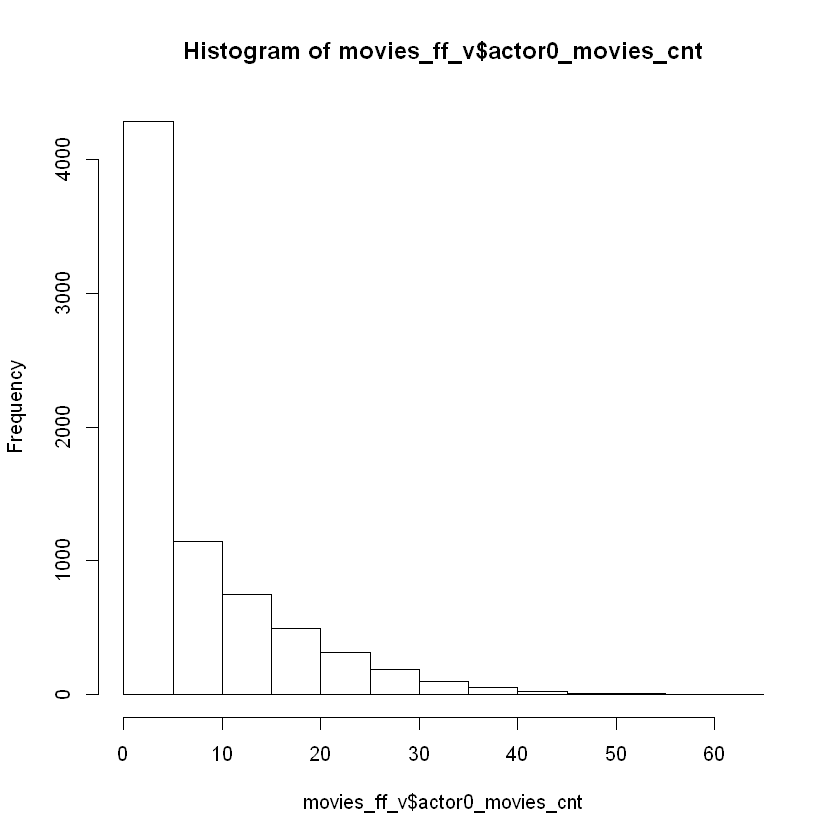

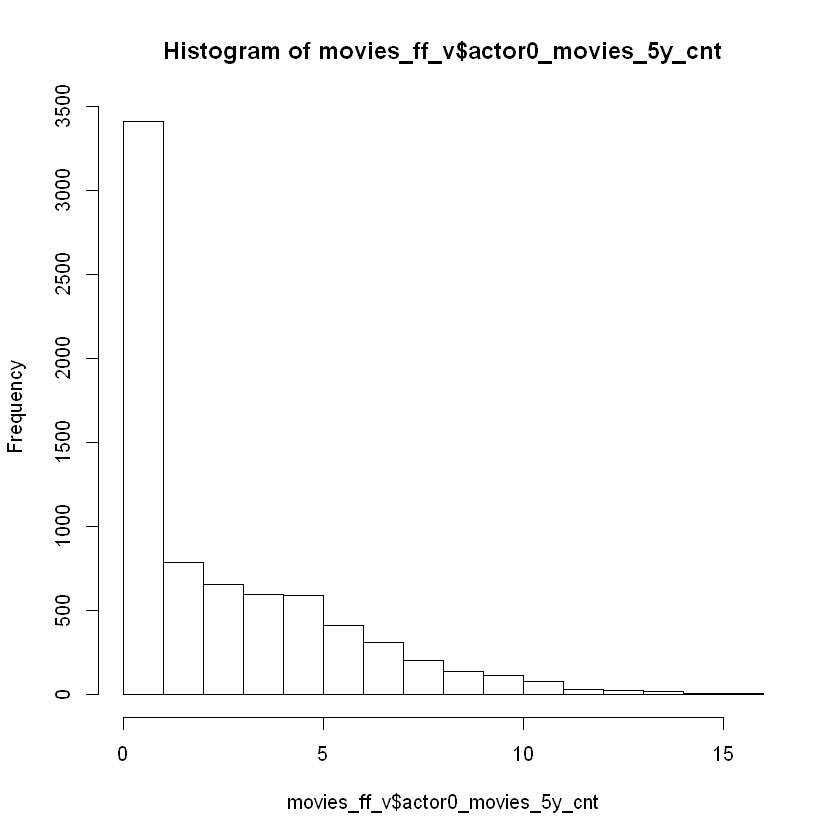

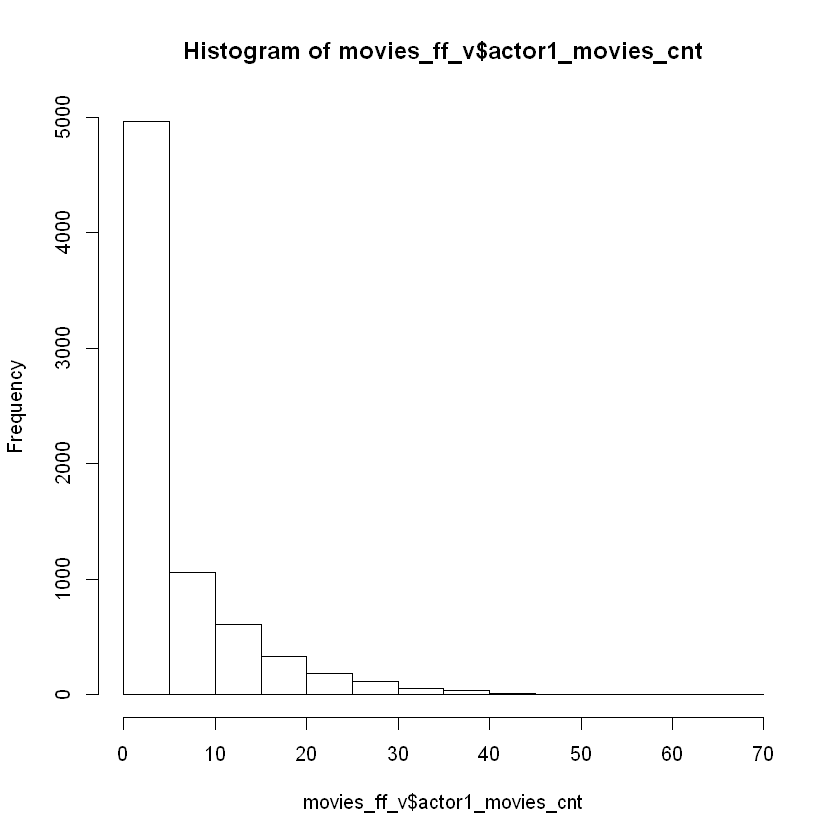

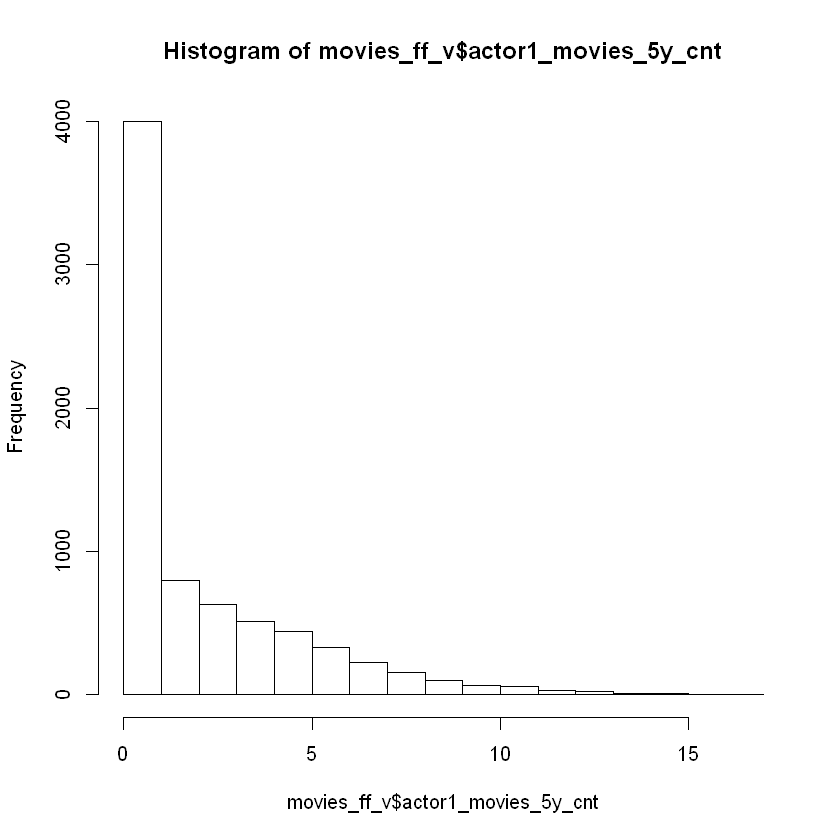

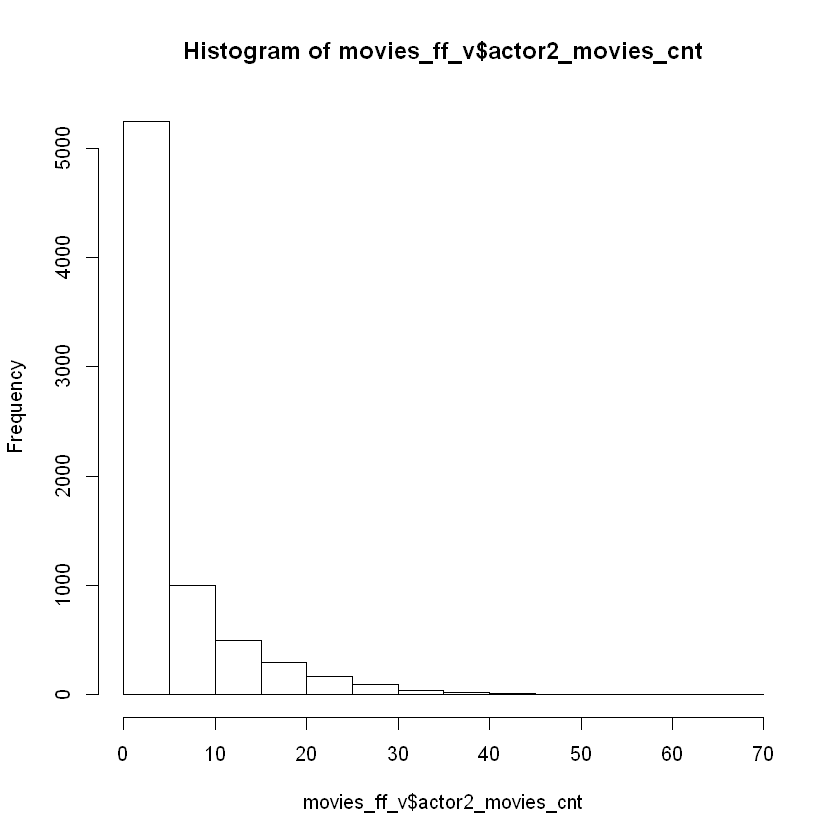

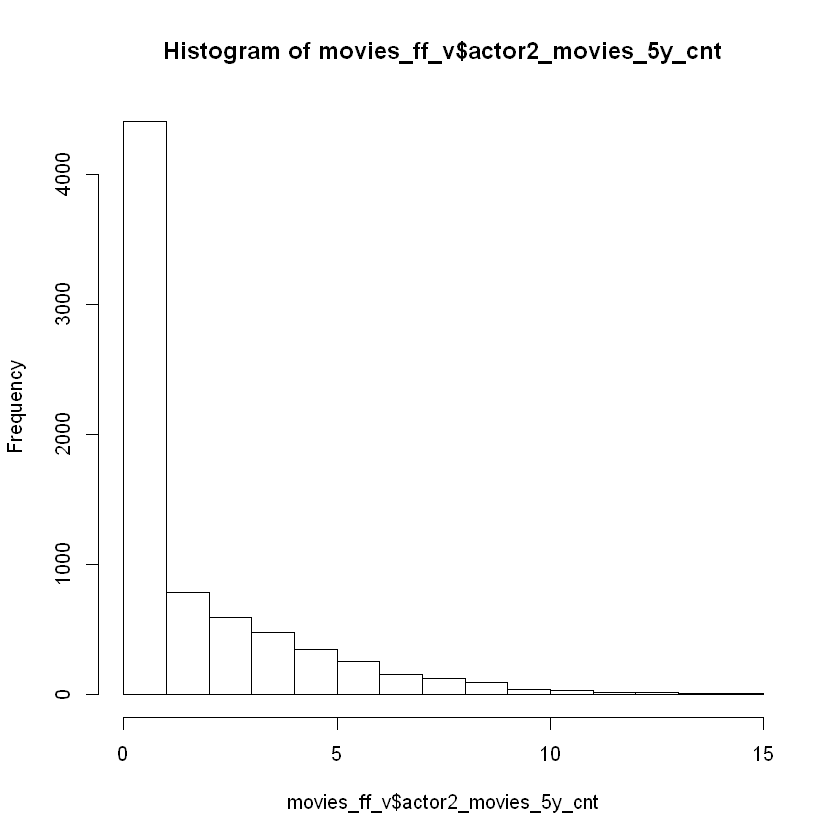

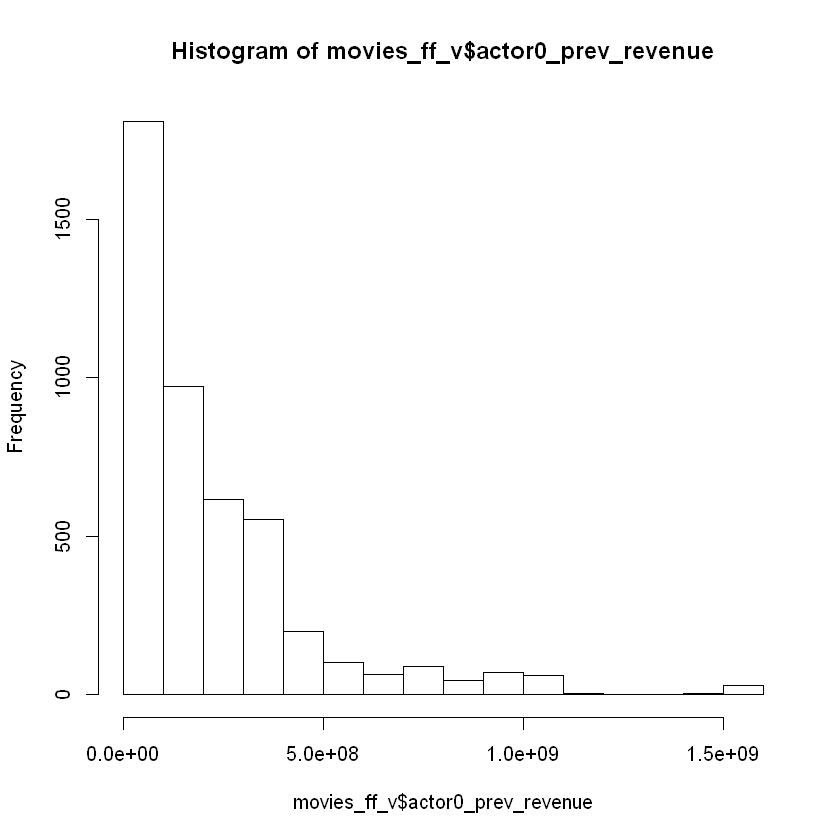

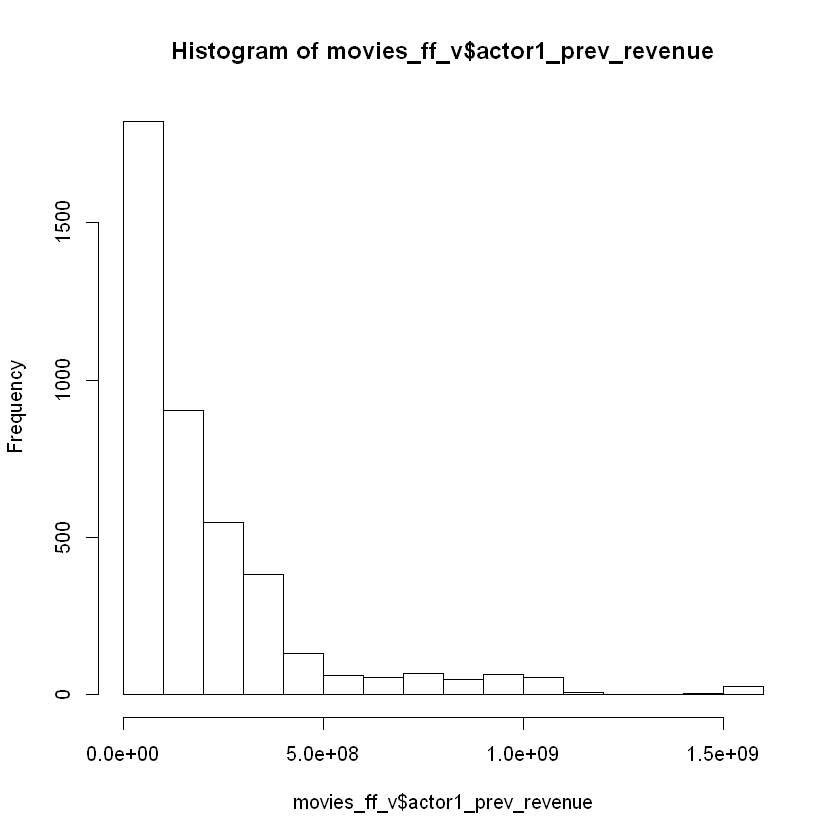

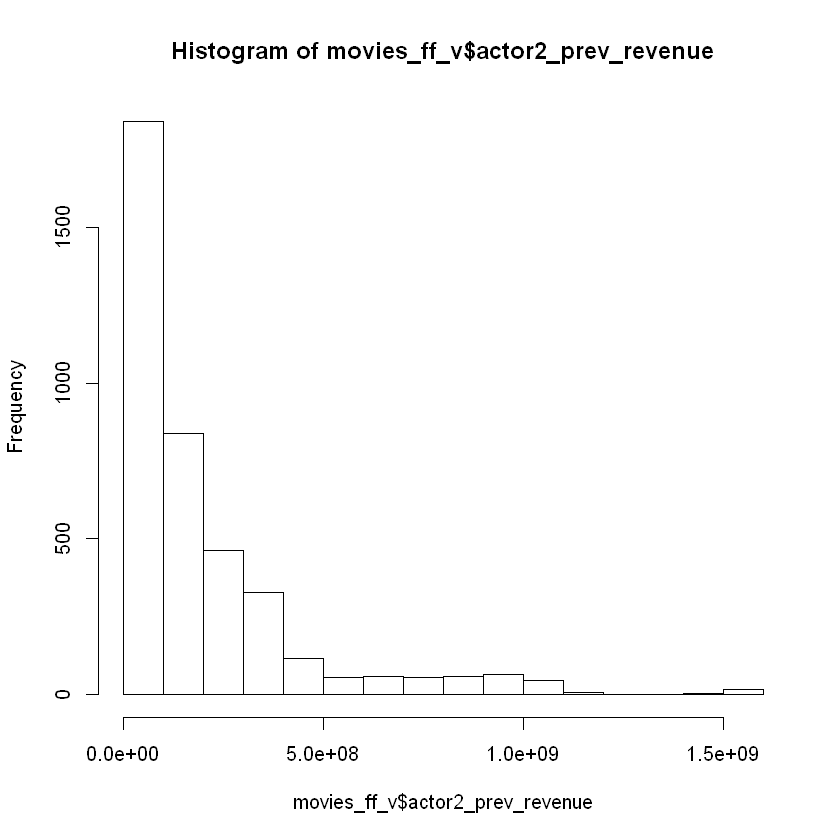

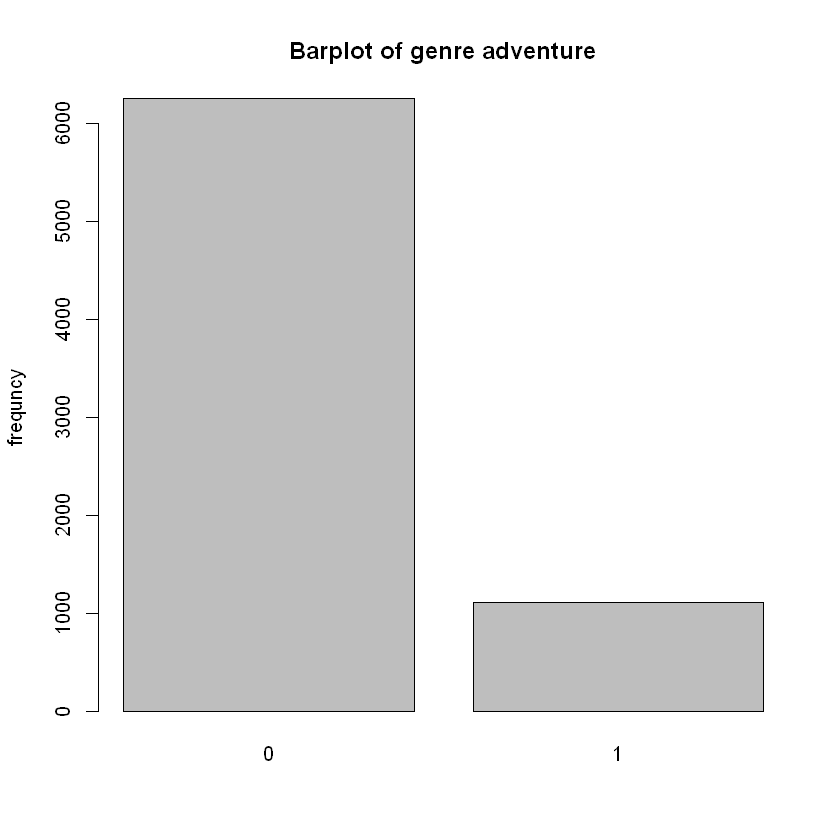

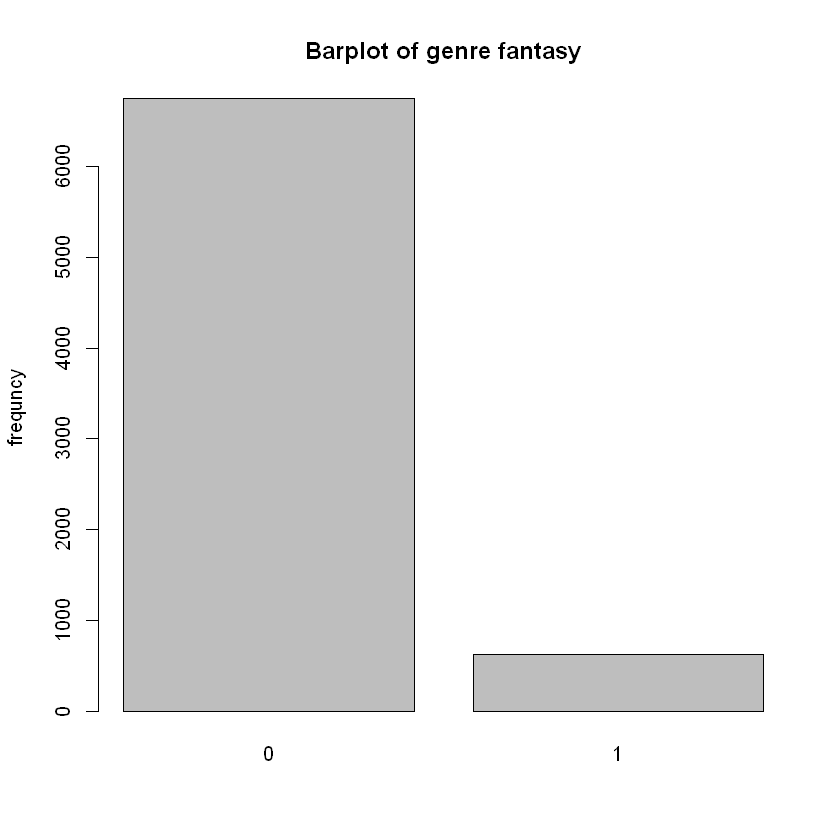

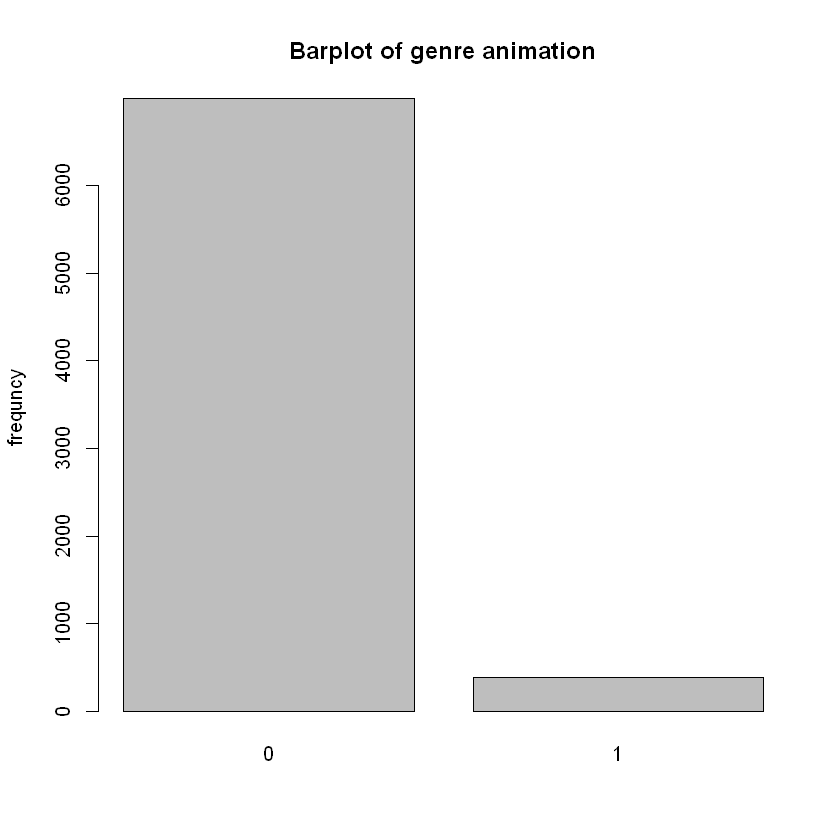

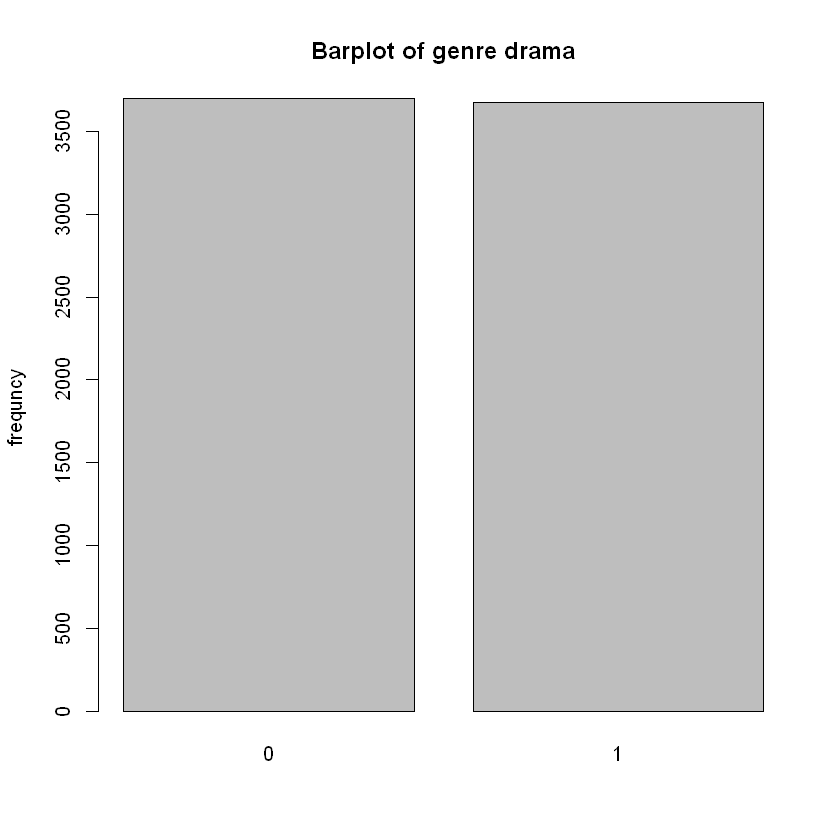

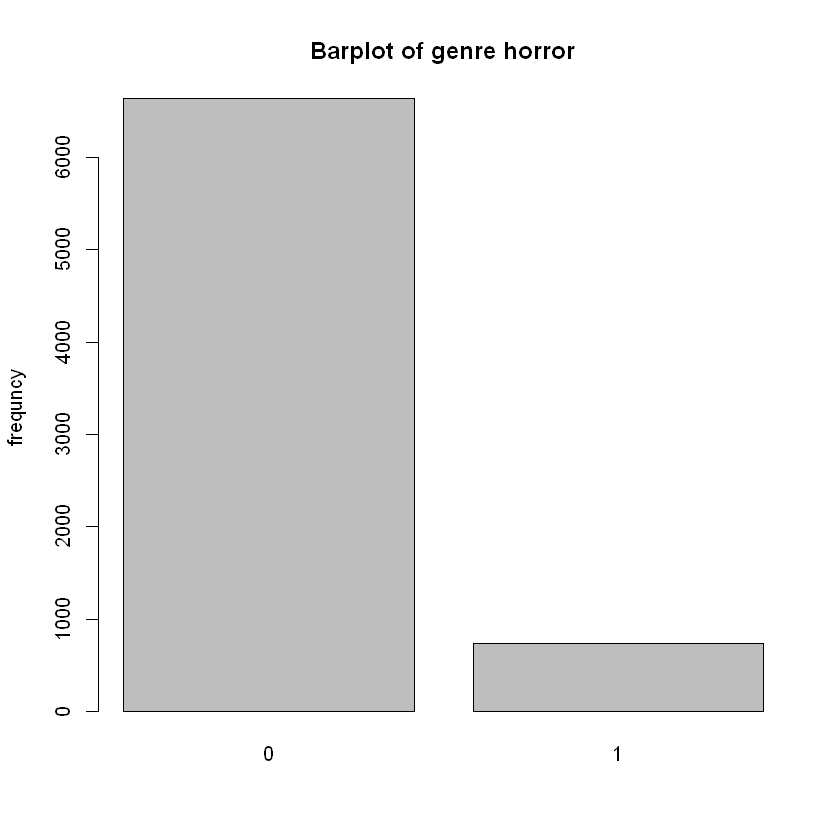

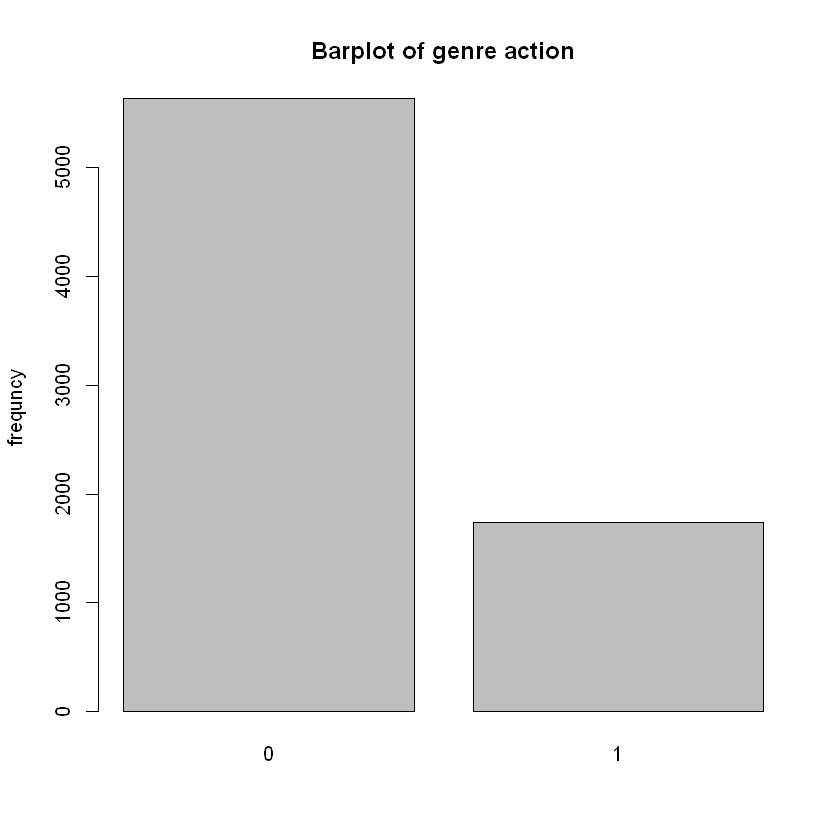

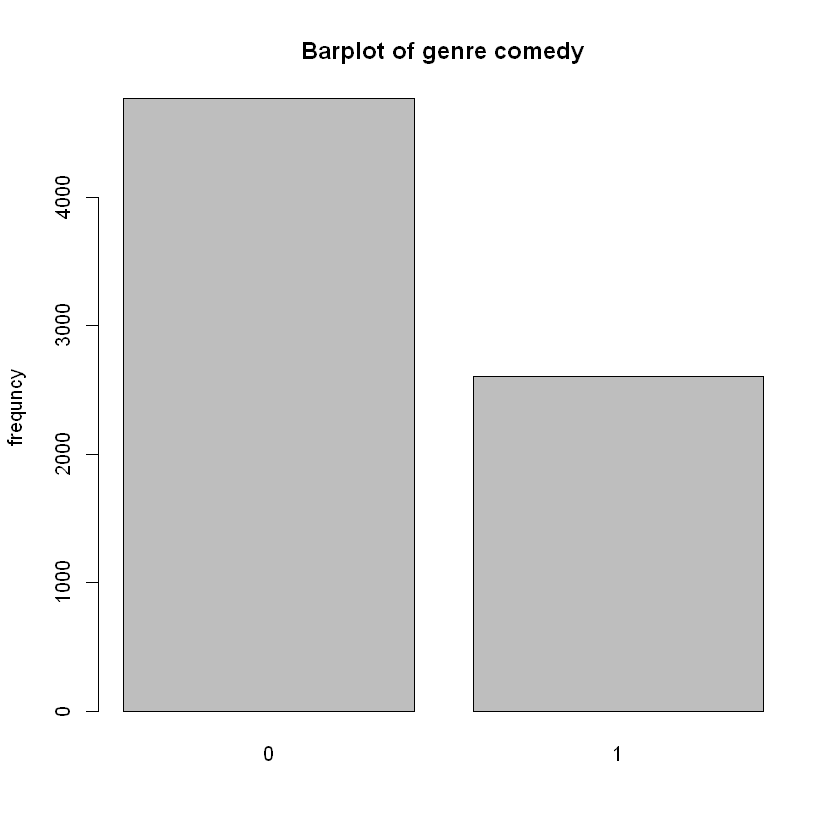

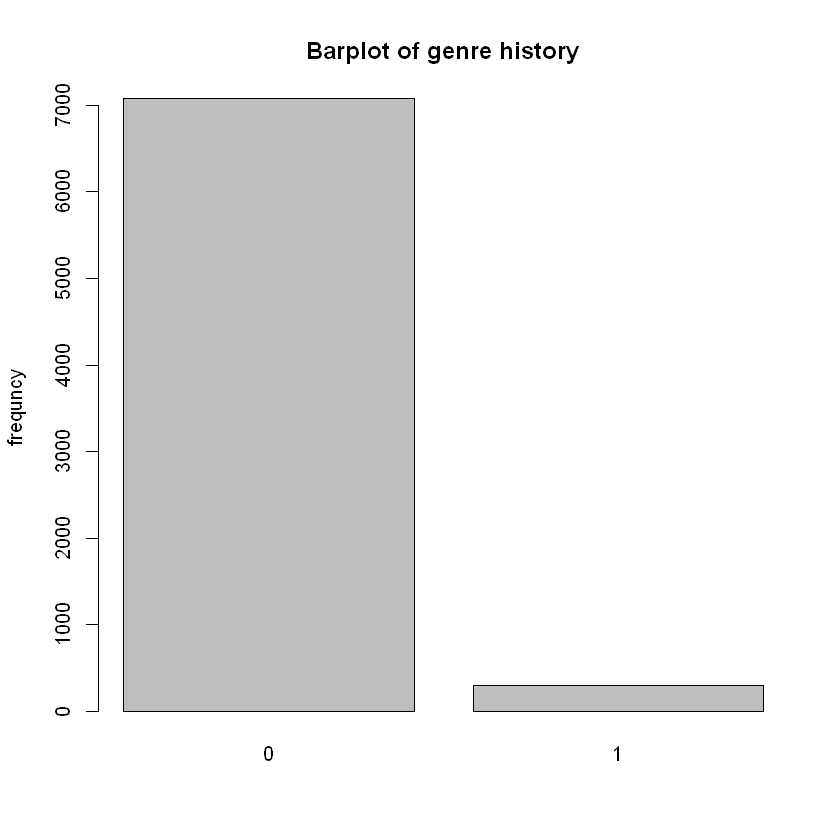

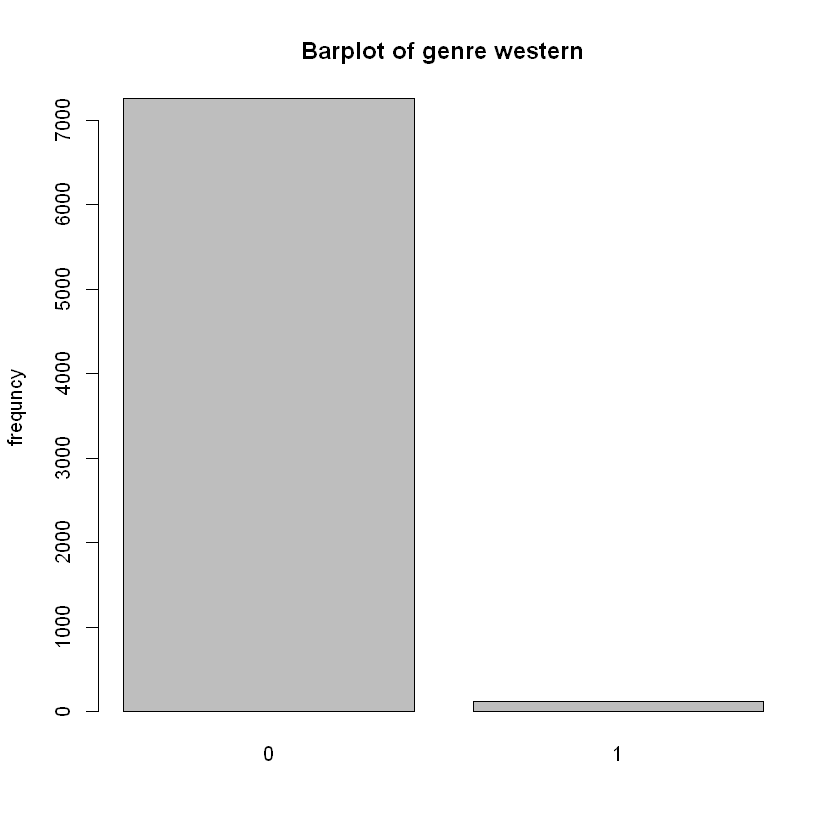

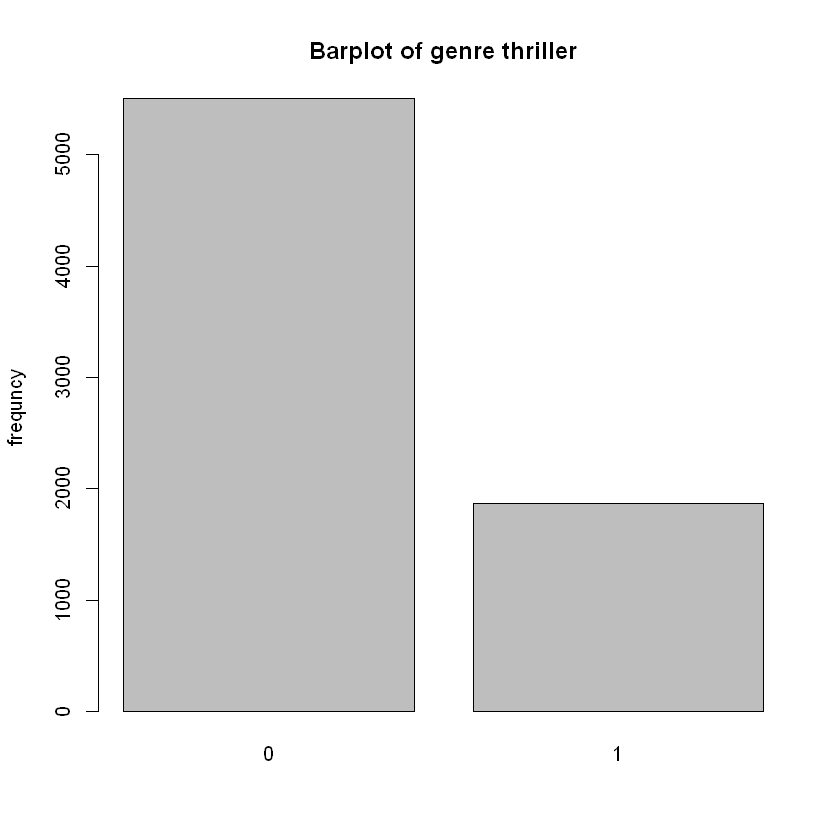

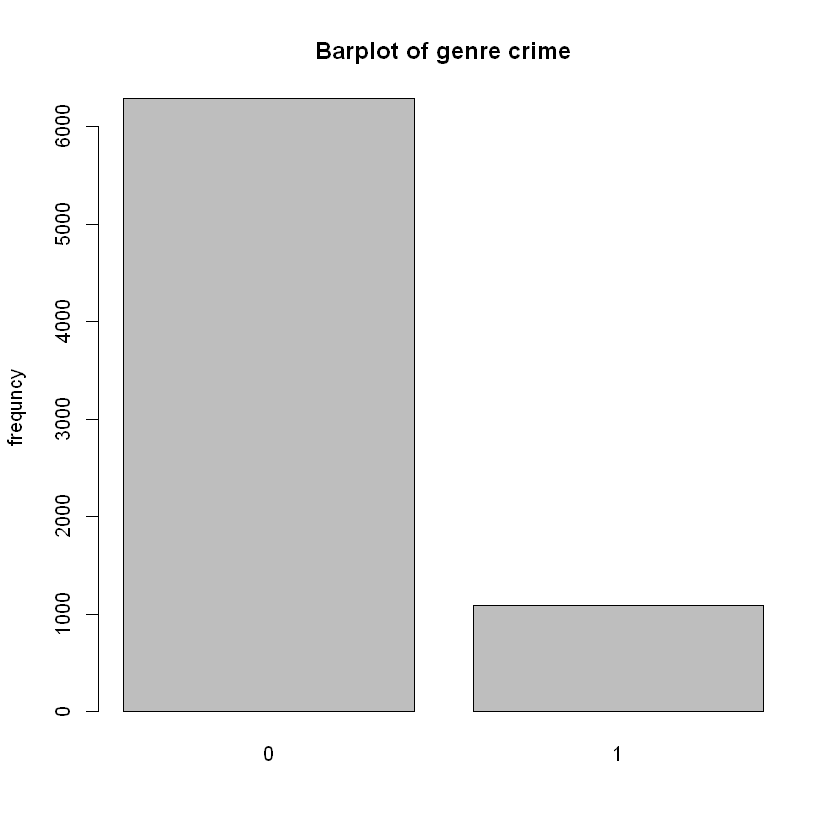

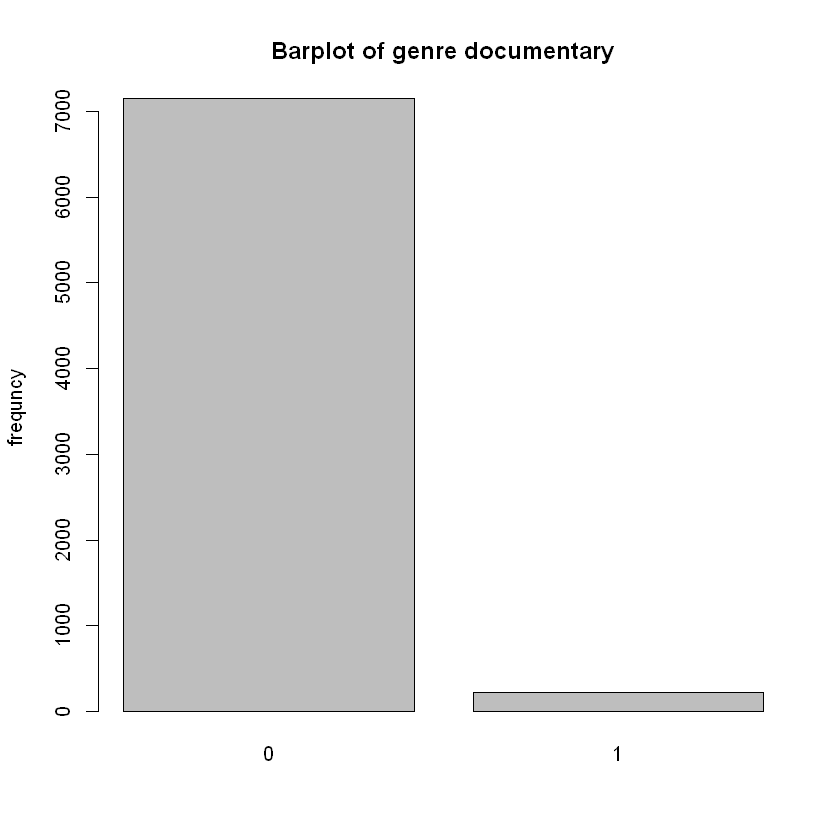

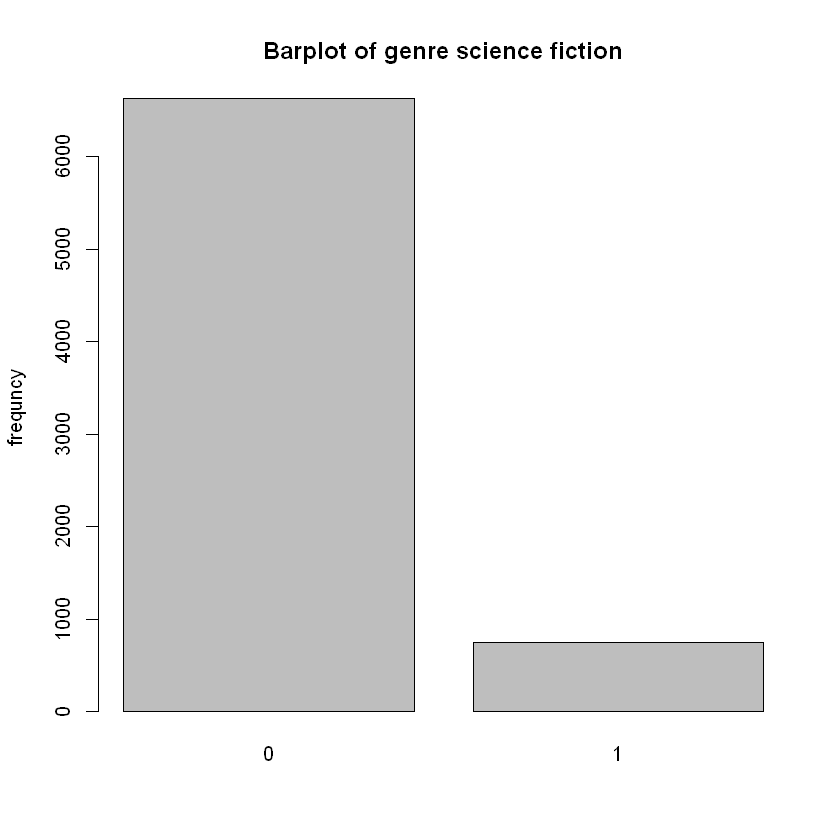

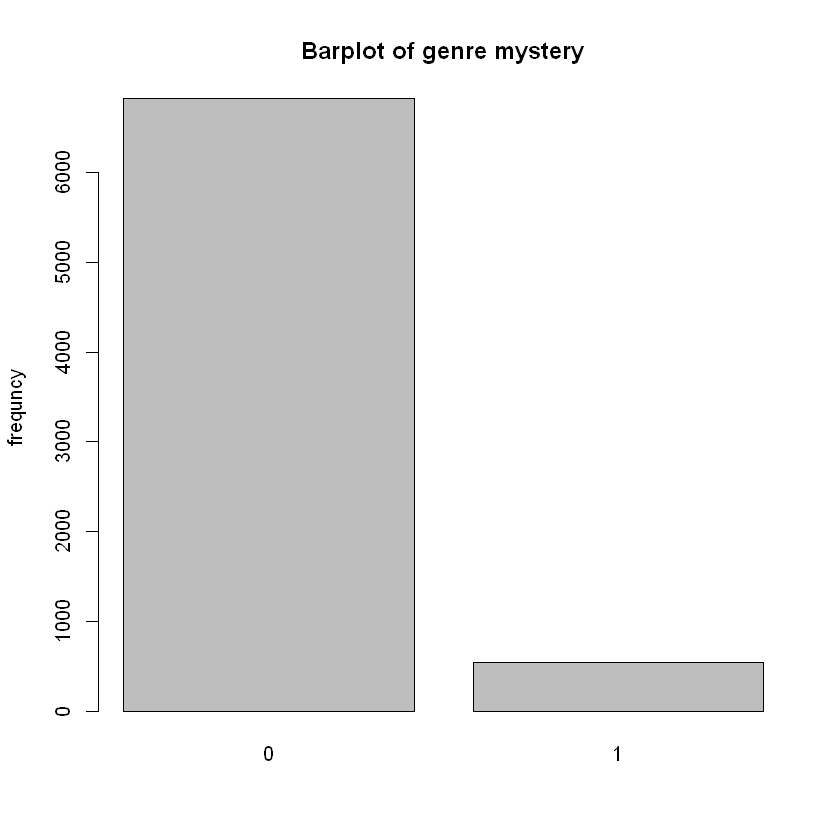

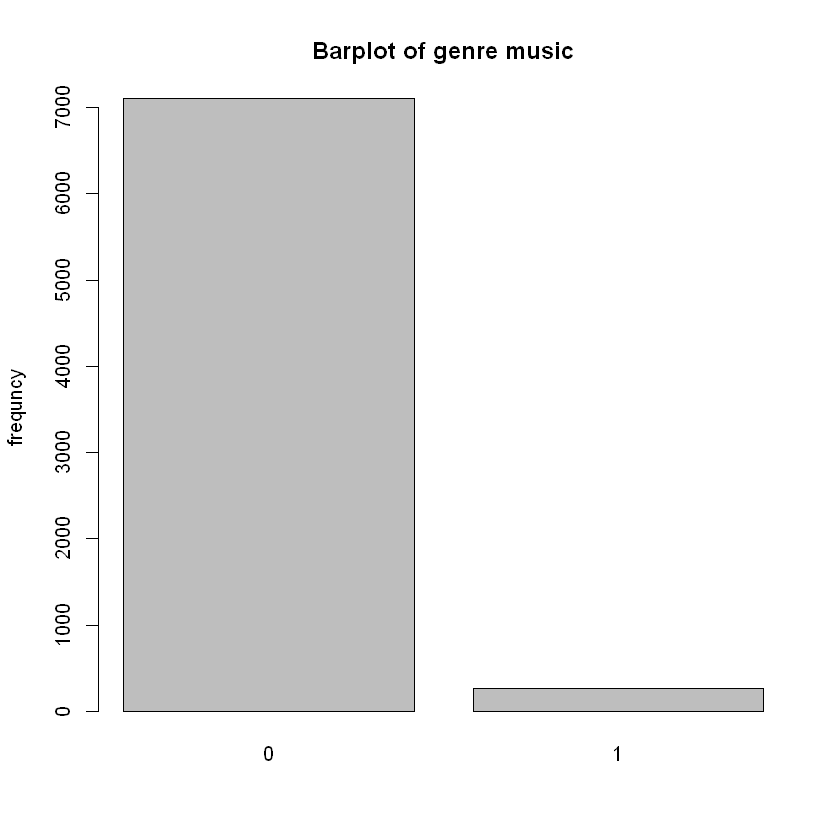

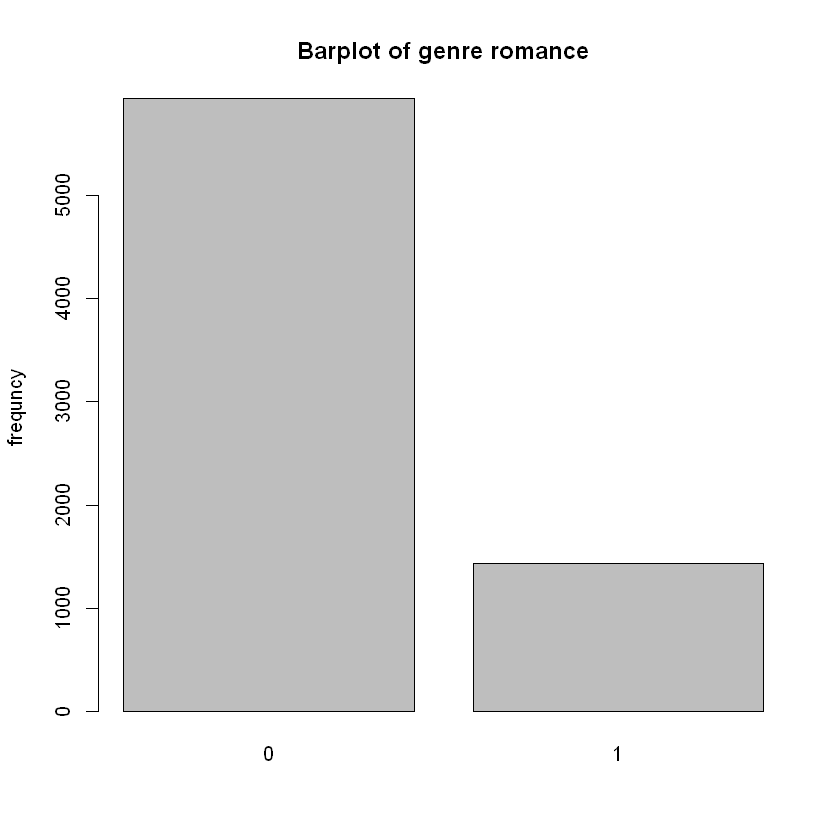

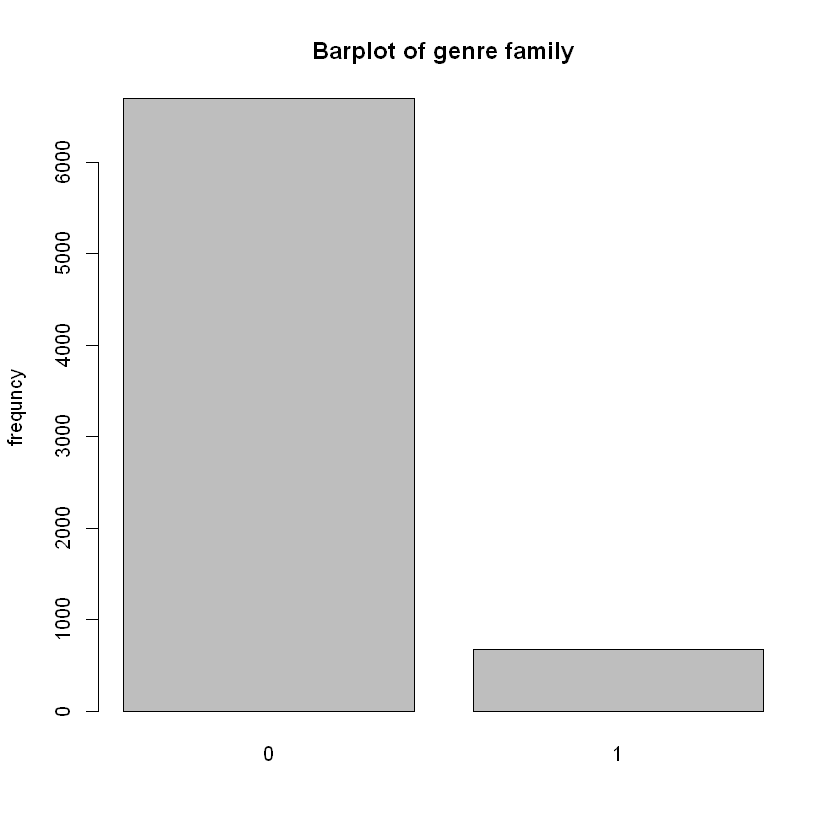

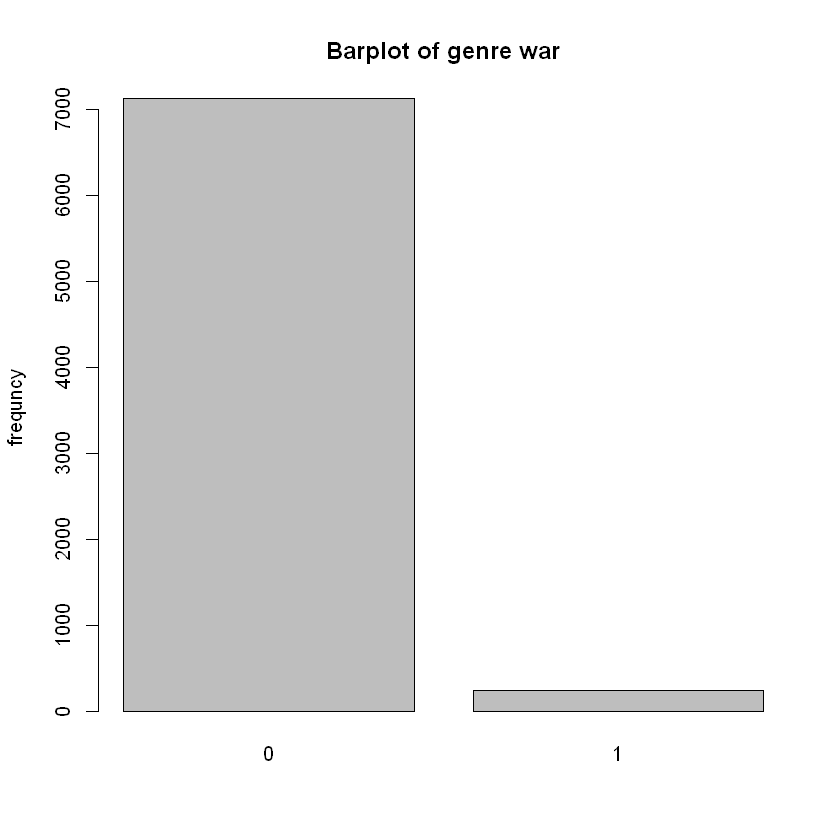

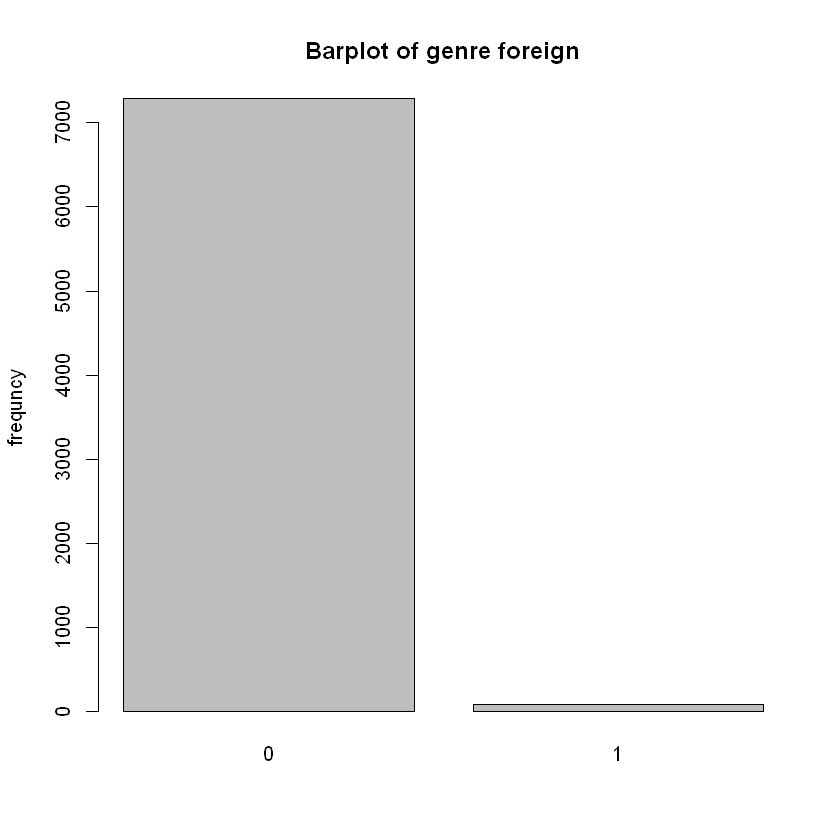

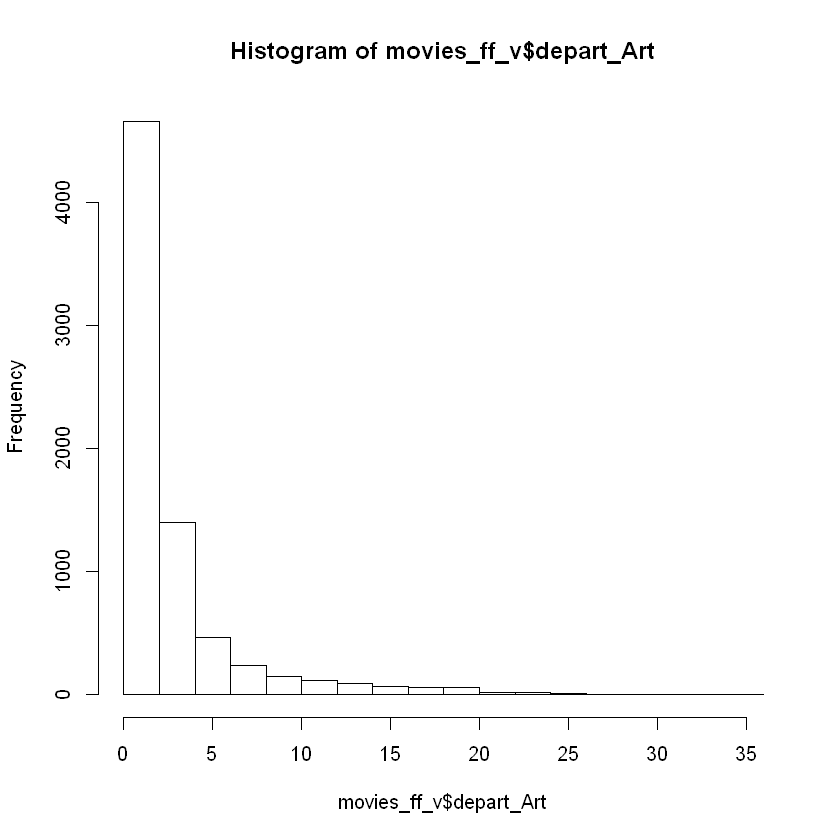

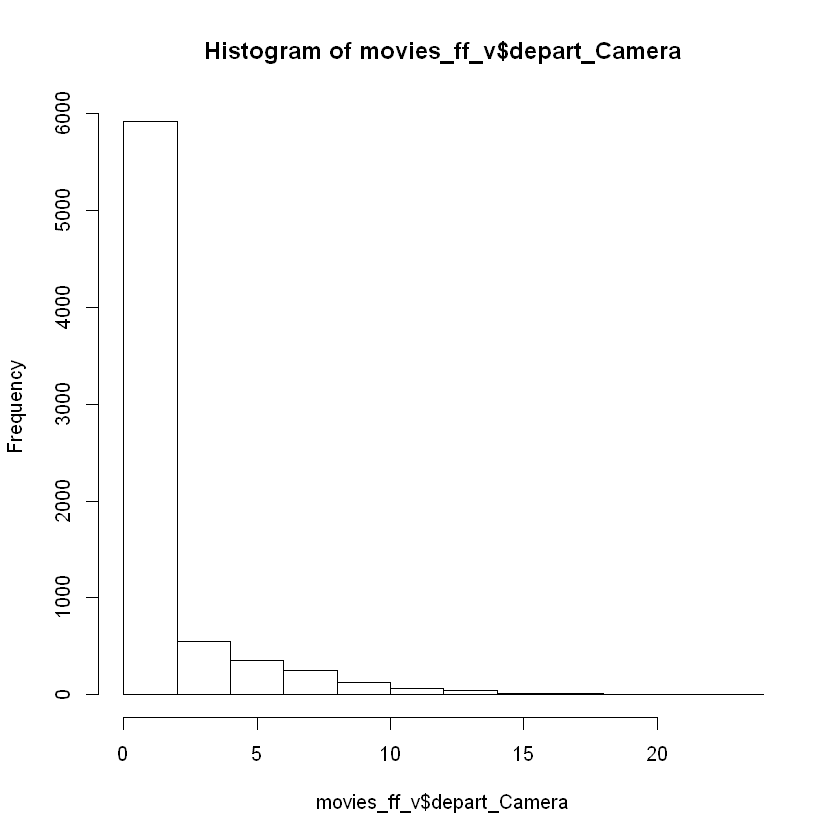

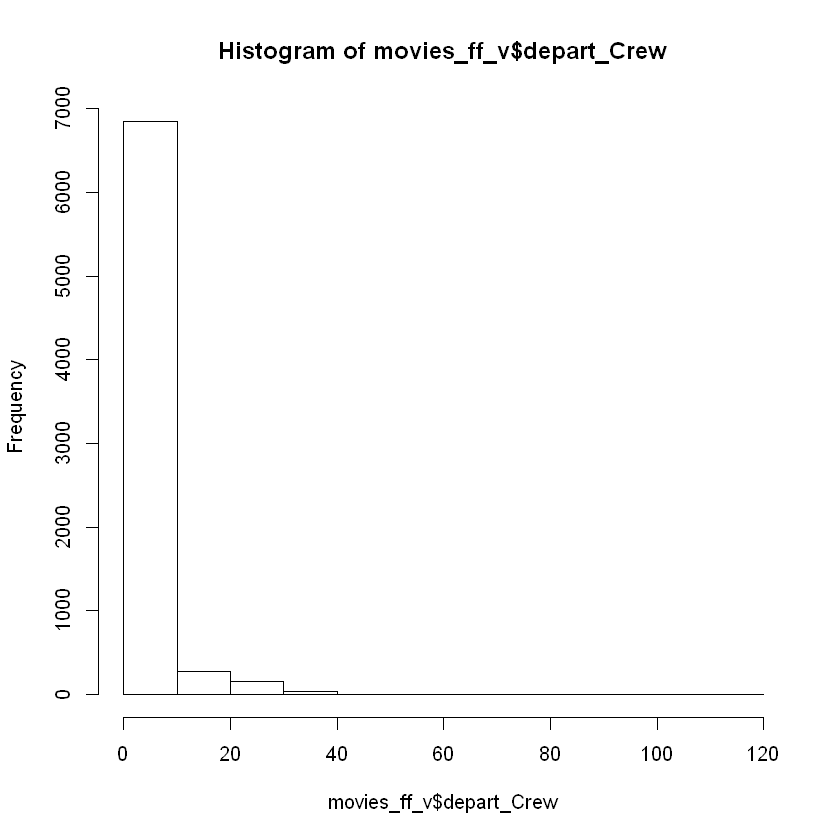

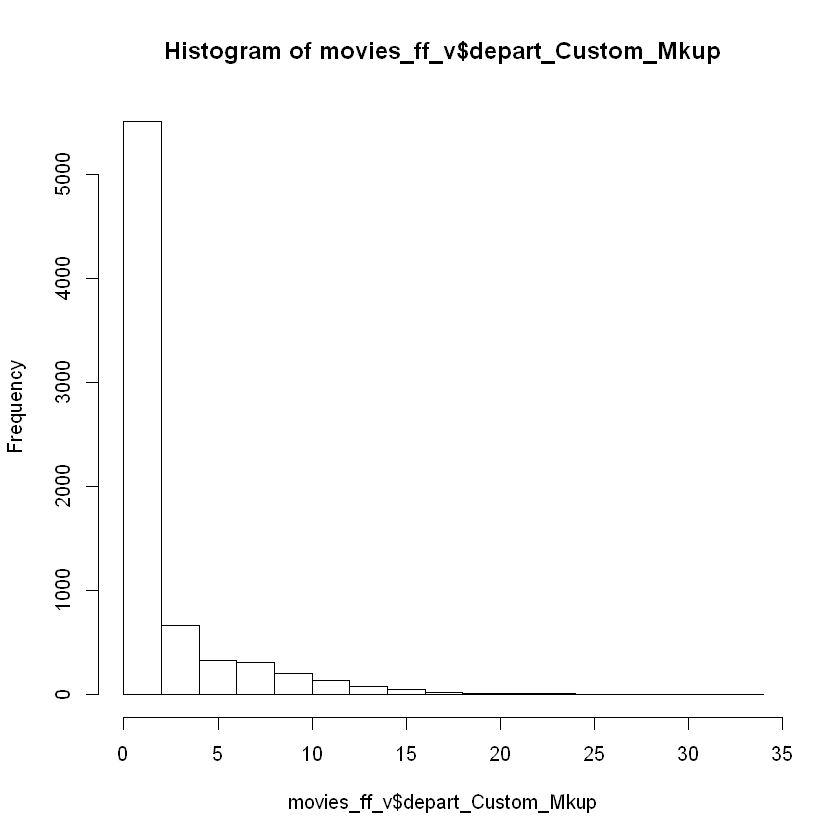

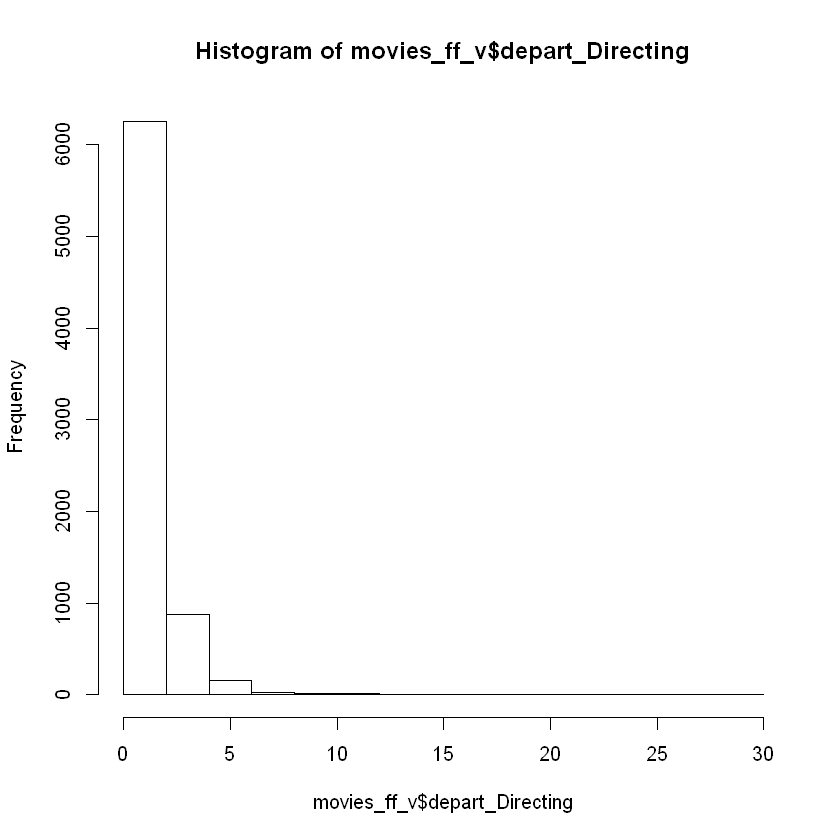

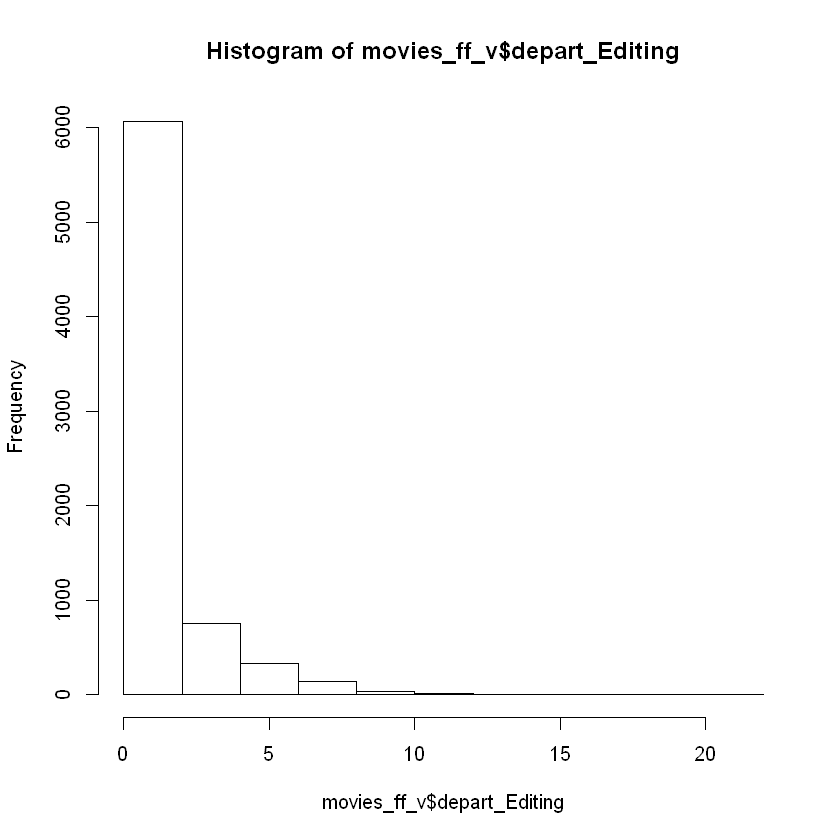

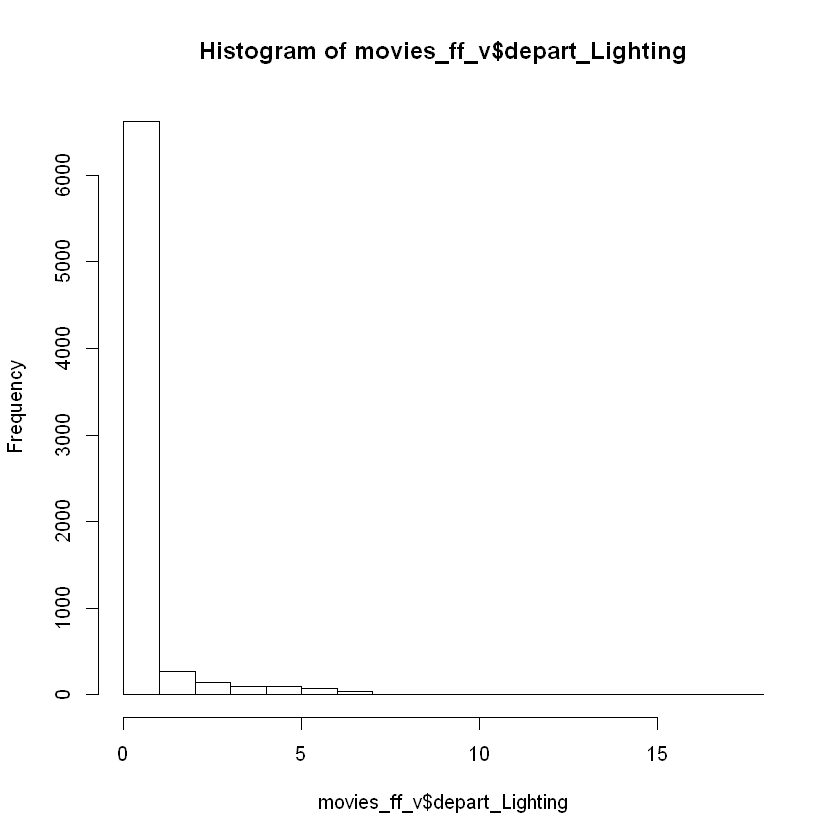

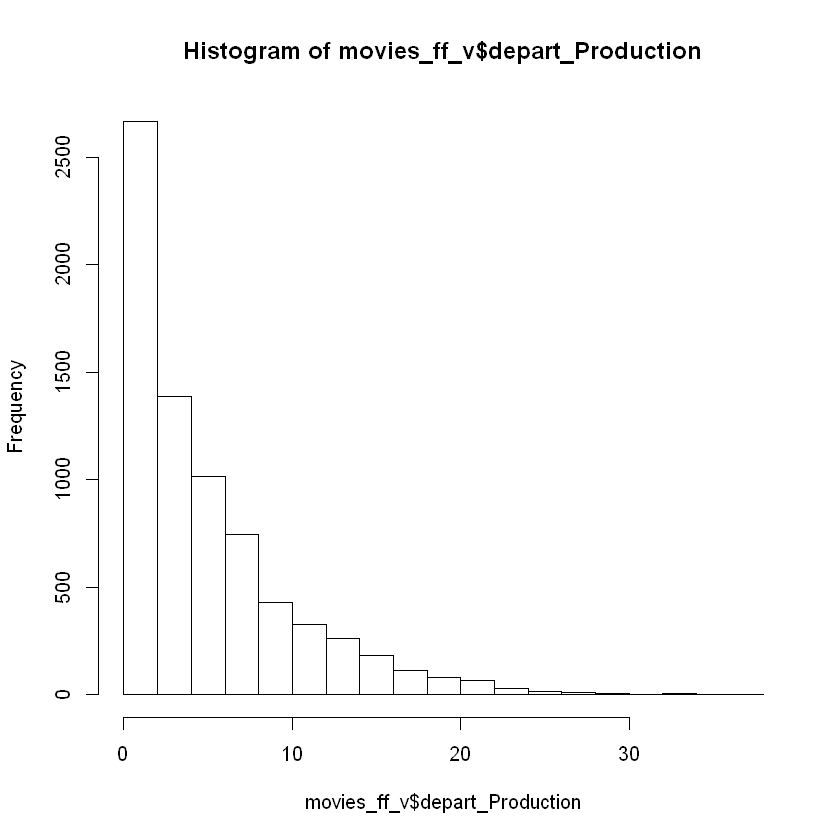

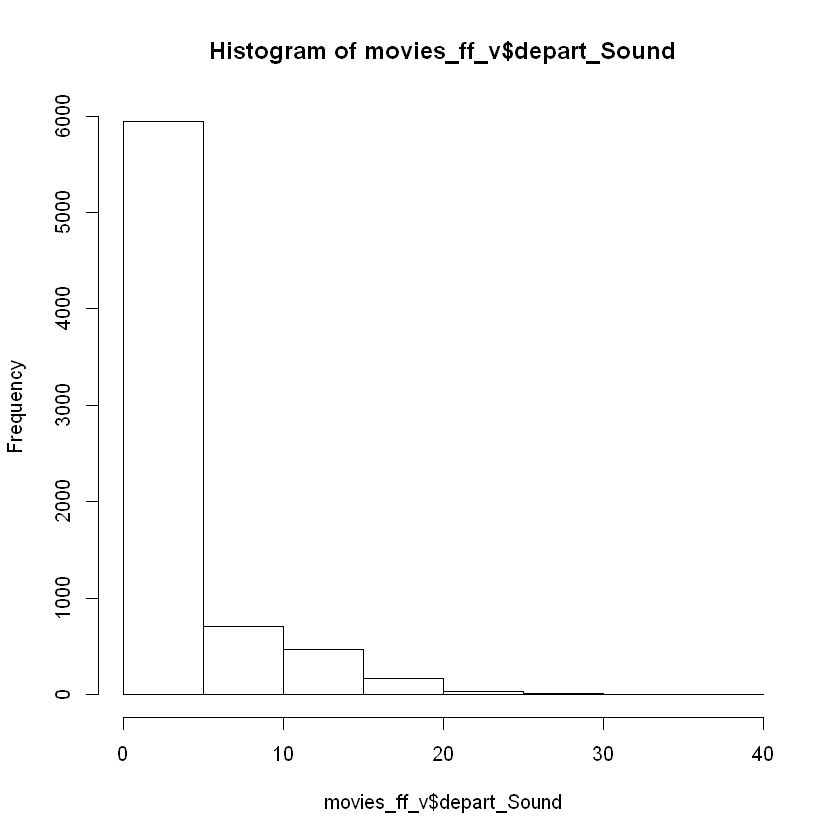

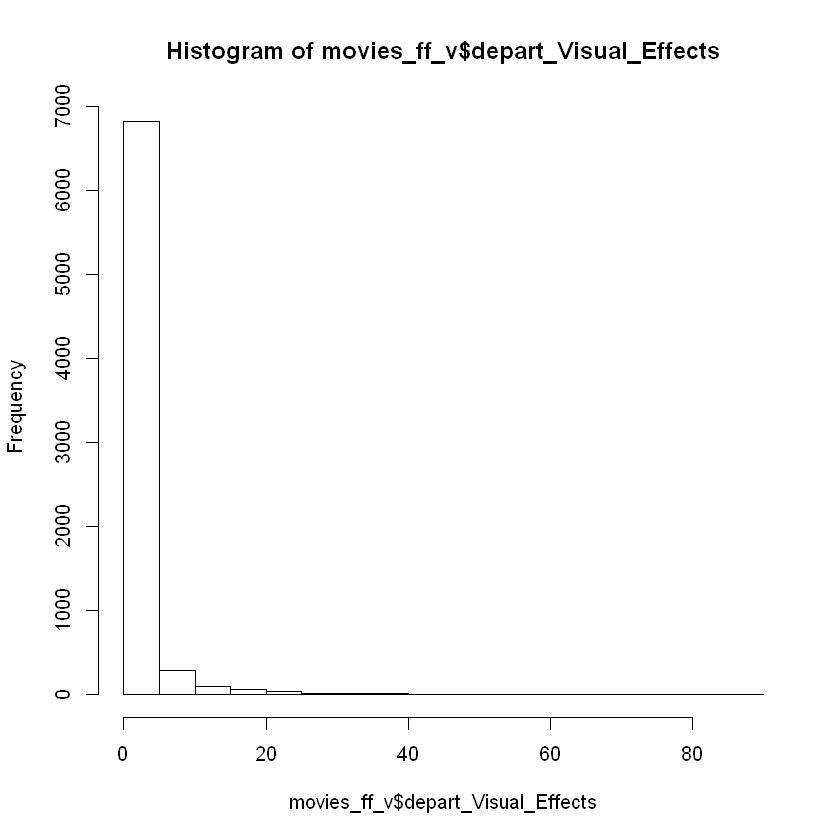

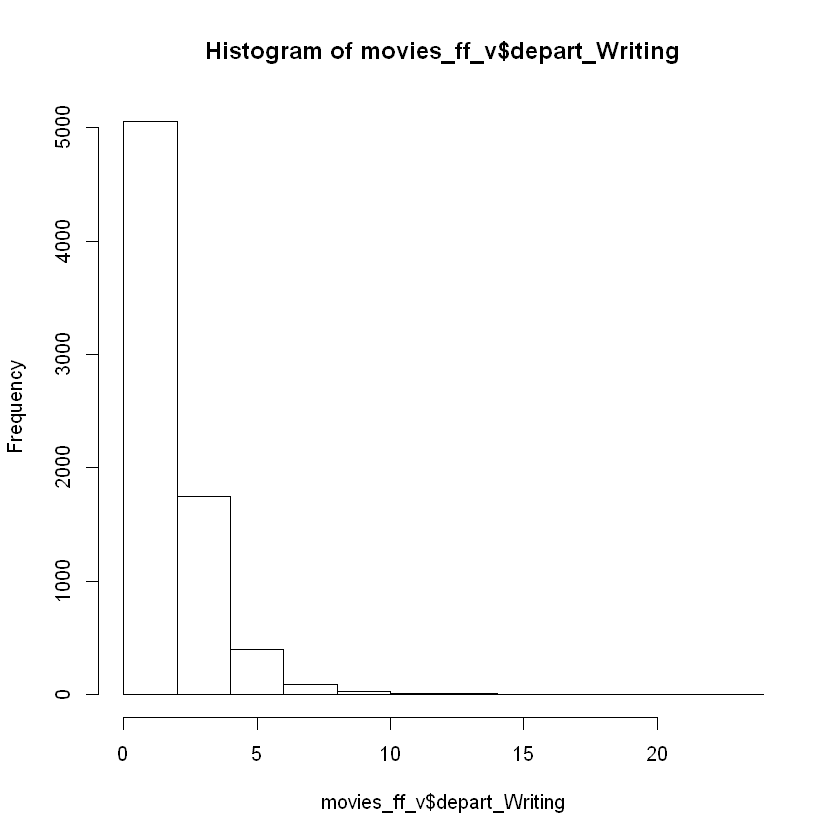

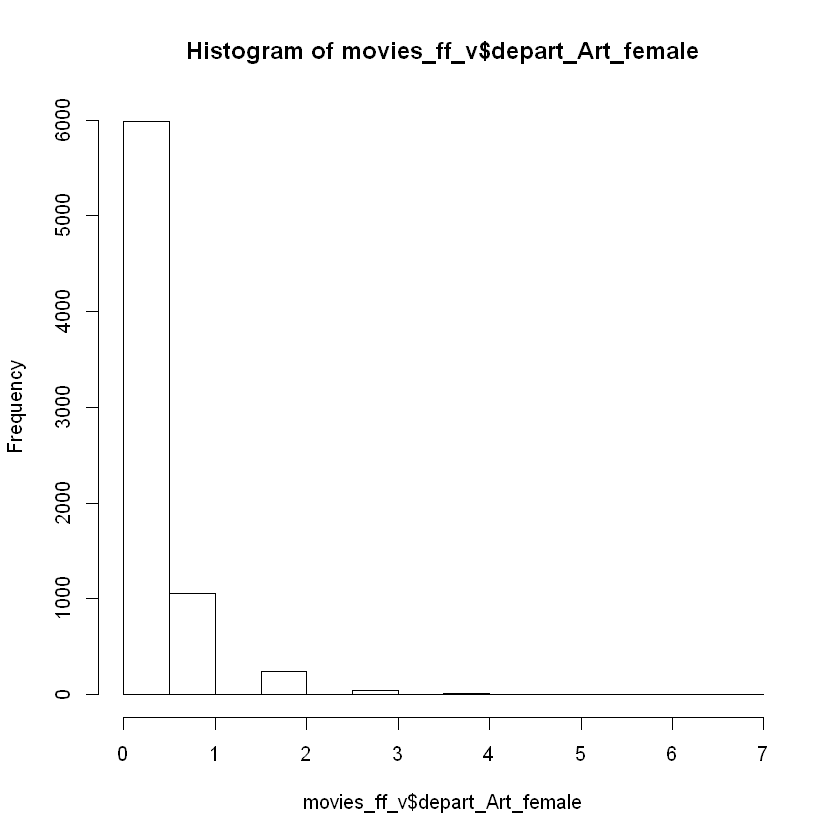

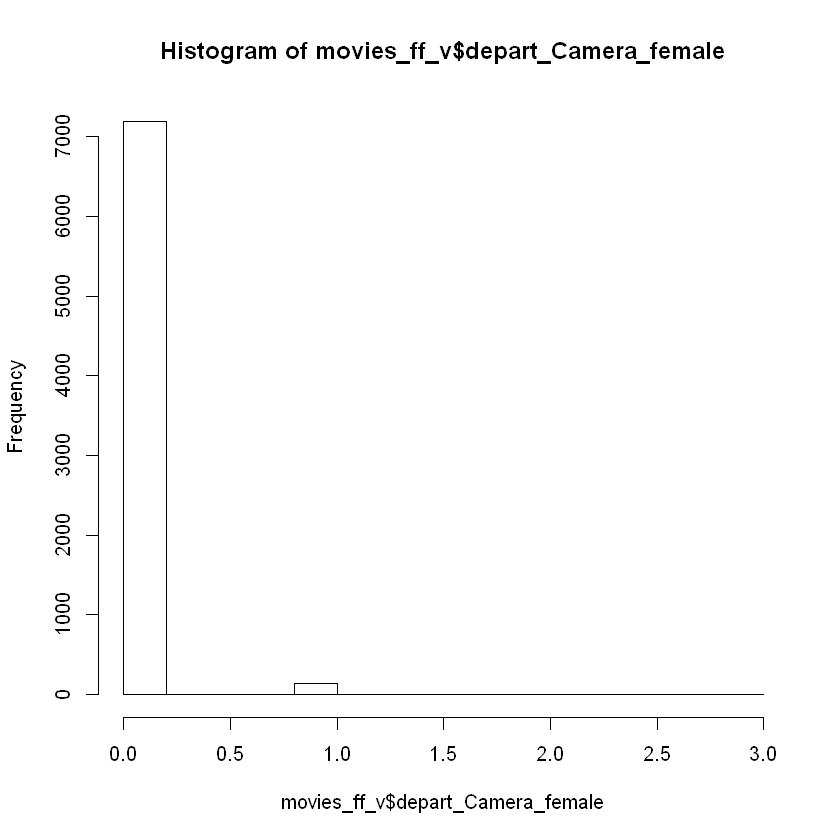

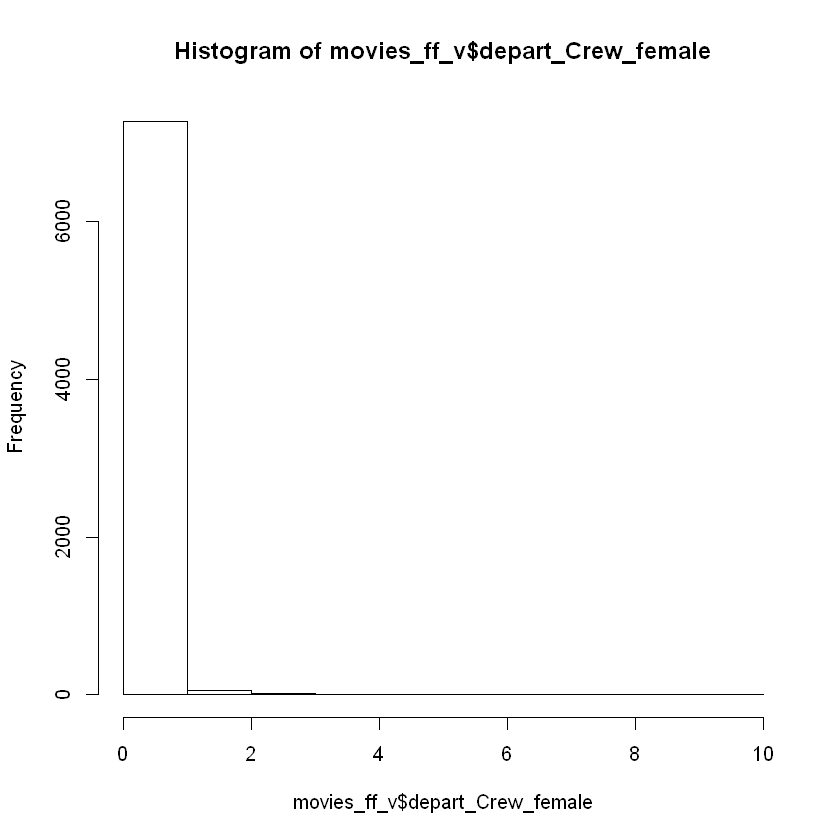

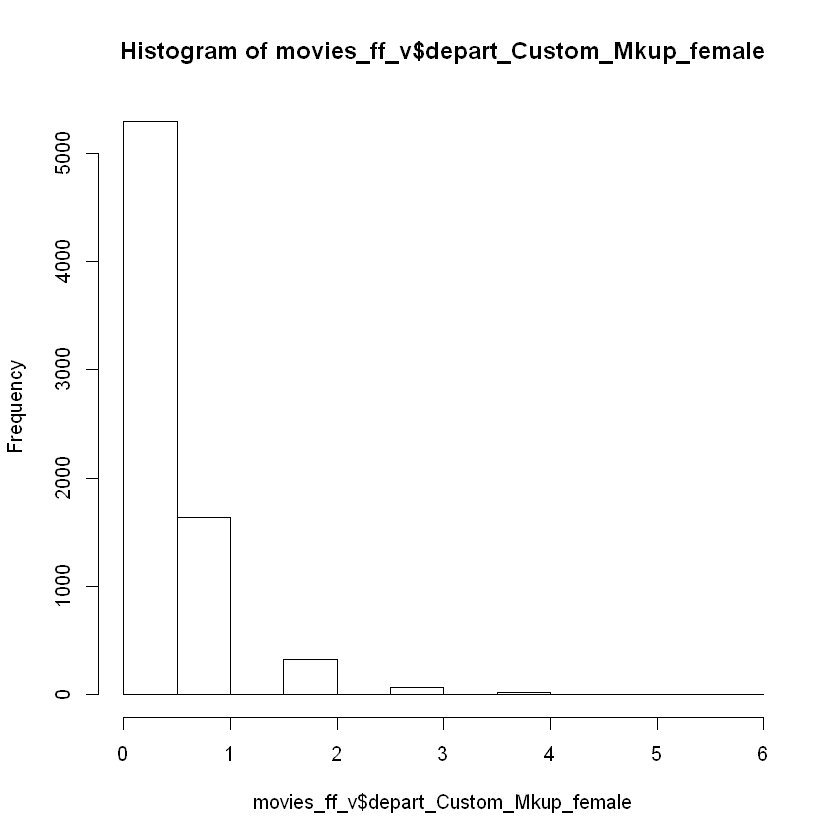

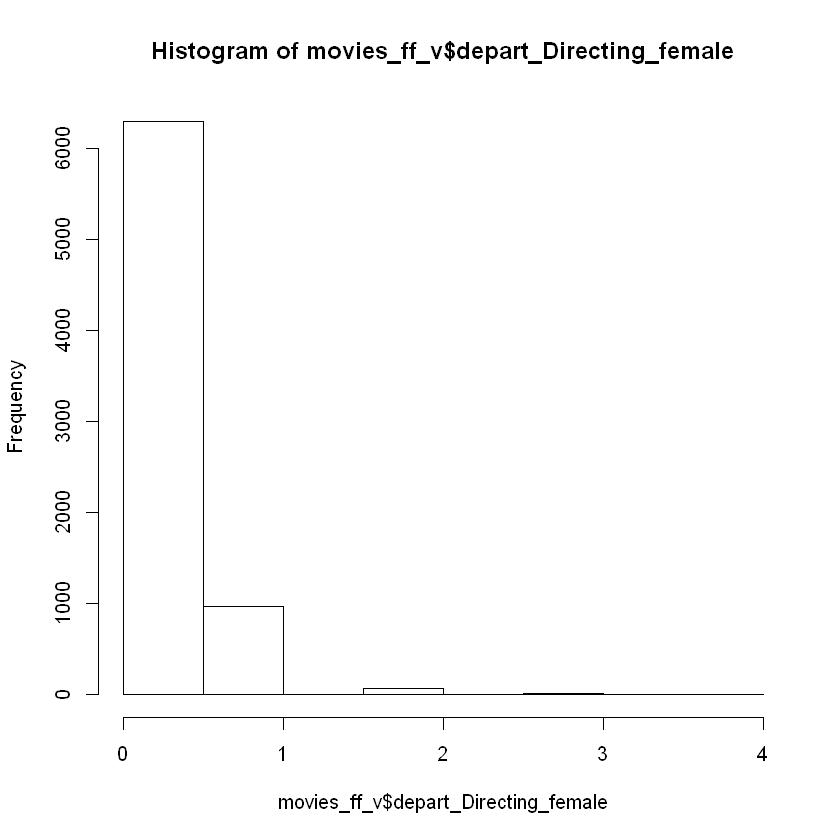

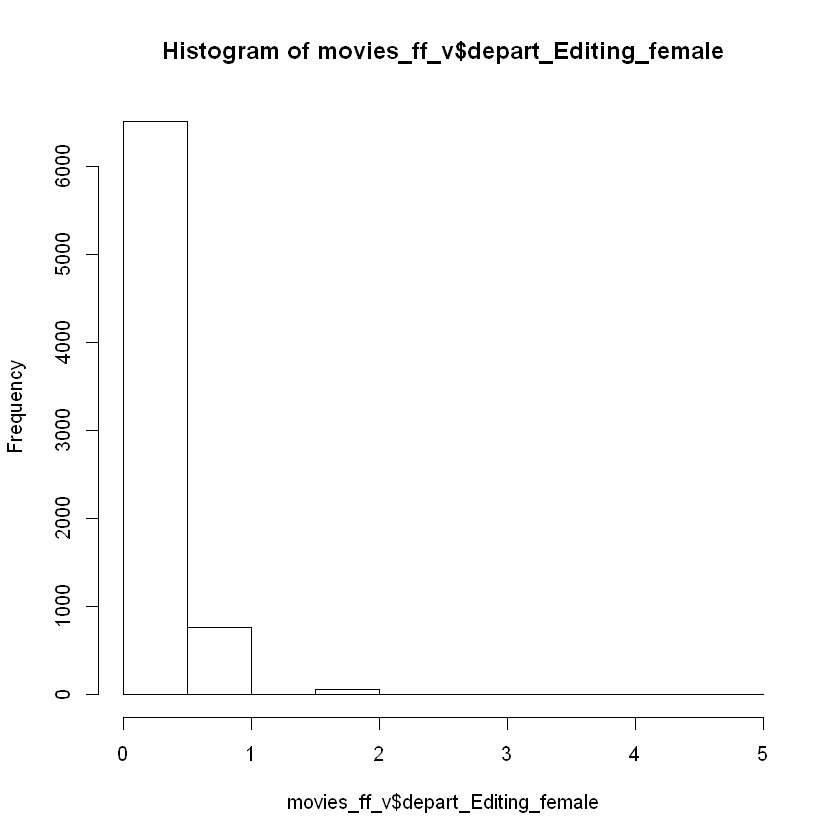

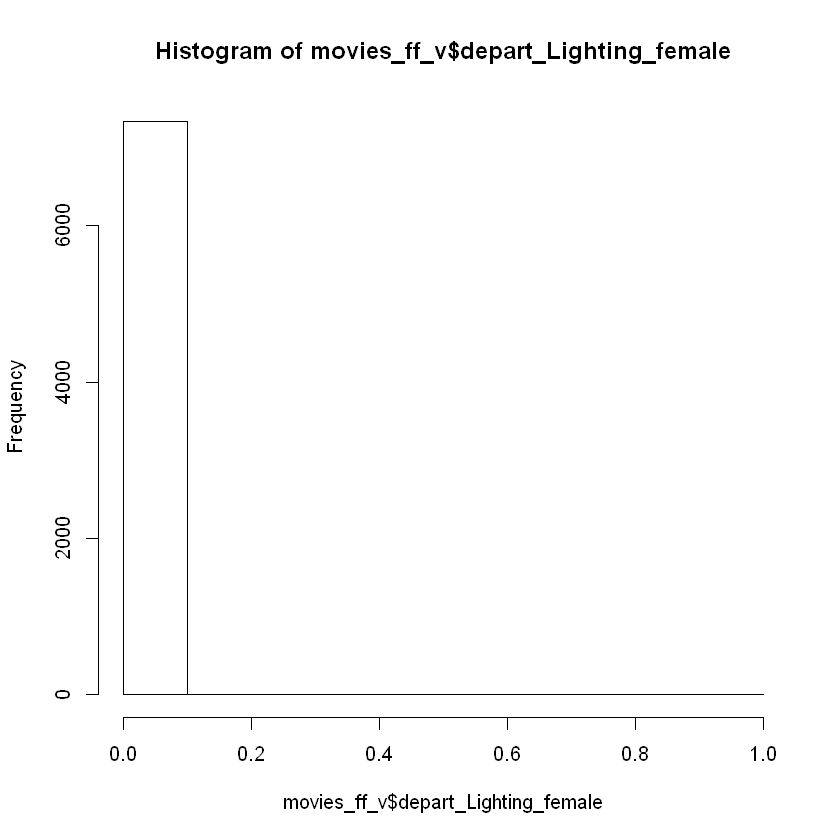

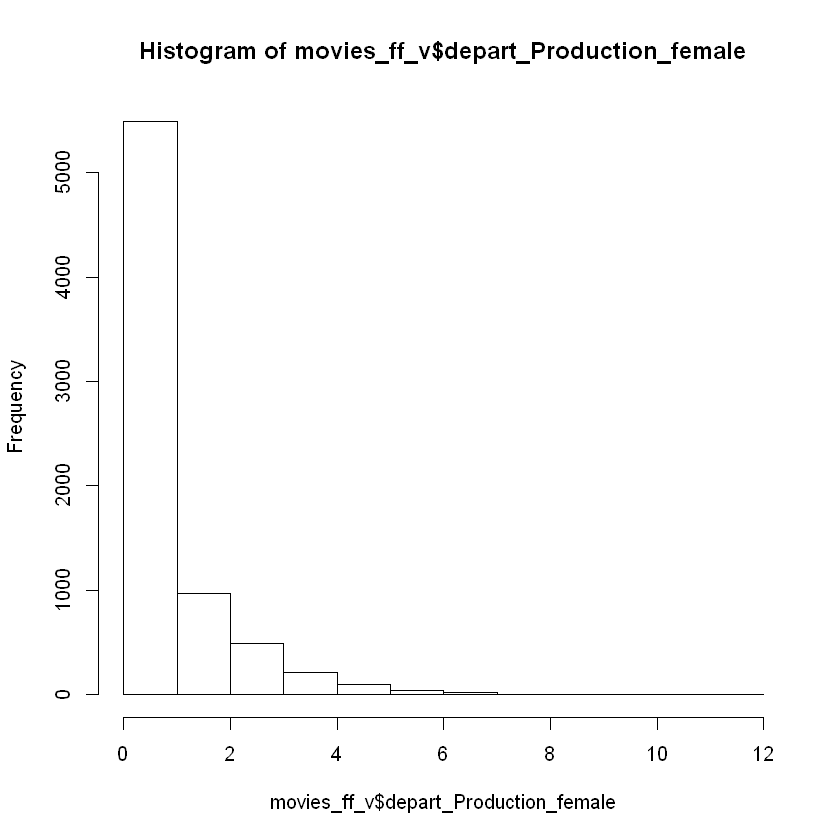

In [90]:
barplot(table(movies_ff_v$original_language),ylab='frequncy',main='Barplot of original language')
hist(movies_ff_v$keyword_cnt)
barplot(table(movies_ff_v$release_day),ylab='frequncy',main='Barplot of release day')
barplot(table(movies_ff_v$release_year),ylab='frequncy',main='Barplot of release year')
barplot(table(movies_ff_v$release_month),ylab='frequncy',main='Barplot of release month')
hist(movies_ff_v$actor0_movies_cnt)
hist(movies_ff_v$actor0_movies_5y_cnt)
hist(movies_ff_v$actor1_movies_cnt)
hist(movies_ff_v$actor1_movies_5y_cnt)
hist(movies_ff_v$actor2_movies_cnt)
hist(movies_ff_v$actor2_movies_5y_cnt)
hist(movies_ff_v$actor0_prev_revenue)
hist(movies_ff_v$actor1_prev_revenue)
hist(movies_ff_v$actor2_prev_revenue)
barplot(table(movies_ff_v$genre_adventure),ylab='frequncy',main='Barplot of genre adventure')
barplot(table(movies_ff_v$genre_fantasy),ylab='frequncy',main='Barplot of genre fantasy')
barplot(table(movies_ff_v$genre_animation),ylab='frequncy',main='Barplot of genre animation')
barplot(table(movies_ff_v$genre_drama),ylab='frequncy',main='Barplot of genre drama')
barplot(table(movies_ff_v$genre_horror),ylab='frequncy',main='Barplot of genre horror')
barplot(table(movies_ff_v$genre_action),ylab='frequncy',main='Barplot of genre action')
barplot(table(movies_ff_v$genre_comedy),ylab='frequncy',main='Barplot of genre comedy')
barplot(table(movies_ff_v$genre_history),ylab='frequncy',main='Barplot of genre history')
barplot(table(movies_ff_v$genre_western),ylab='frequncy',main='Barplot of genre western')
barplot(table(movies_ff_v$genre_thriller),ylab='frequncy',main='Barplot of genre thriller')
barplot(table(movies_ff_v$genre_crime),ylab='frequncy',main='Barplot of genre crime')
barplot(table(movies_ff_v$genre_documentary),ylab='frequncy',main='Barplot of genre documentary')
barplot(table(movies_ff_v$genre_science_fiction),ylab='frequncy',main='Barplot of genre science fiction')
barplot(table(movies_ff_v$genre_mystery),ylab='frequncy',main='Barplot of genre mystery')
barplot(table(movies_ff_v$genre_music),ylab='frequncy',main='Barplot of genre music')
barplot(table(movies_ff_v$genre_romance),ylab='frequncy',main='Barplot of genre romance')
barplot(table(movies_ff_v$genre_family),ylab='frequncy',main='Barplot of genre family')
barplot(table(movies_ff_v$genre_war),ylab='frequncy',main='Barplot of genre war')
barplot(table(movies_ff_v$genre_foreign),ylab='frequncy',main='Barplot of genre foreign')
hist(movies_ff_v$depart_Art)
hist(movies_ff_v$depart_Camera)
hist(movies_ff_v$depart_Crew)
hist(movies_ff_v$depart_Custom_Mkup)
hist(movies_ff_v$depart_Directing)
hist(movies_ff_v$depart_Editing)
hist(movies_ff_v$depart_Lighting)
hist(movies_ff_v$depart_Production)
hist(movies_ff_v$depart_Sound)
hist(movies_ff_v$depart_Visual_Effects)
hist(movies_ff_v$depart_Writing)
hist(movies_ff_v$depart_Art_female)
hist(movies_ff_v$depart_Camera_female)
hist(movies_ff_v$depart_Crew_female)
hist(movies_ff_v$depart_Custom_Mkup_female)
hist(movies_ff_v$depart_Directing_female)
hist(movies_ff_v$depart_Editing_female)
hist(movies_ff_v$depart_Lighting_female)
hist(movies_ff_v$depart_Production_female)






















In [92]:
movies_ff_v.numric <- movies_ff_v %>% filter movies_ff_v[,2]

ERROR: Error in pairs.default(movies_ff_v): non-numeric argument to 'pairs'


In [101]:
movies_ff_v[,2]

[1]  14000000  40000000   3300000   1200000         0   8000000  14000000
   [8]         0         0   6000000   1000000         0  15000000  53000000
  [15] 102000000    500000  26000000         0   8000000  32000000  80000000
  [22]   4000000         0         0         0         0  10000000  11000000
  [29]   6000000  45000000  13000000         0  90000000         0 140000000
  [36]  30000000         0  50000000         0   3800000         0   3000000
  [43]  25000000   6000000  15000000   3906840  80000000  44000000         0
  [50]  38000000    560000  12000000         0         0  20000000         0
  [57]         0 125000000         0  14000000 150000000   4000000         0
  [64]   5000000  12000000   1500000  12000000         0   2000000  85000000
  [71]  29000000         0  11000000         0    445000  17000000    500000
  [78]   6000000         0   1500000  15000000  10284523  43000000  28000000
  [85]   2000000  50000000   8000000   7500000  20000000         0  30000000
  [92]         0  35000000         0  15000000         0   2500000         0
  [99]  10500000   6000000   7000000  60000000         0         0         0
 [106]  10900000  31000000  72000000  14000000  15000000  75000000  35000000
 [113] 100000000  20000000  93000000  25000000         0         0         0
 [120]  12716953  90000000 150000000   1500000  25000000   7500000  40000000
 [127]         0  10000000  18000000   2400000   4000000   6000000         0
 [134]  65000000  10000000   2000000         0   9000000         0 110000000
 [141]  14320000         0   3500000  18000000   4000000         0         0
 [148]  39200000         0  25000000         0         0         0   4000000
 [155]         0  20000000   3500000         0  63600000  32000000   3500000
 [162]         0    125000   9000000  40000000         0         0  19000000
 [169]   5000000   2000000         0         0   3500000  11000000  12468389
 [176]  38000000  90000000         0  15000000  32000000  30000000         0
 [183]         0   6000000  82500000  14000000   5000000    259000 180000000
 [190]         0   4000000  40000000         0         0   4500000         0
 [197]   7000000  60000000  24000000  12600000  85000000  10000000  55000000
 [204]  75000000   3200000   2000000         0  15000000         0 100000000
 [211]  22000000   7000000         0   6700000  20000000  35000000  35000000
 [218]  10000000         0   2600000  12000000         0   5000000  49000000
 [225]         0         0  50000000   7500000   6244087  14000000 110000000
 [232]    800000         0         0  30000000         0  15000000         0
 [239]  22000000  20000000         0  70000000         0         0         0
 [246]  19000000  23000000  18339750 102000000   7920000  12560000  98000000
 [253]   8500000         0     11178   9500000  55000000   1000000         0
 [260]     24554         0  50000000         0  10000000         0  15000000
 [267]  15000000     27000  40000000         0  21000000  72500000  12000000
 [274]  50000000  65000000         0   2915739  70000000         0  65000000
 [281]         0  30000000  12000000  19000000   7000000  25000000   9000000
 [288]         0  24000000  28000000   6000000  16000000  65000000         0
 [295] 160000000         0  60000000  25000000   3000000   9000000  11000000
 [302]    225000         0         0         0 100000000 100000000 108000000
 [309]  30000000  26000000  15000000   9500000  16000000         0 175000000
 [316]  55000000  60000000 115000000  20000000  12000000         0  85000000
 [323] 135000000  90000000  12000000  71000000  26000000  40000000  15000000
 [330] 100000000         0  23000000   5000000         0         1  25000000
 [337]  75000000         0  30000000  11000000         0  27000000         0
 [344]         0  60000000         0  36000000        12   1000000    350000
 [351] 110000000   7200000         0   7000000  20500000         0 130000000
 [358]  45000000  75000000  65000000         0   2200000   3300000  15400000

In [149]:
numericMatrix <- function(data) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
         if ((is.numeric(data[[v]])) & (max(data[[v]],na.rm=TRUE)>1) & (v =!"release_year") & (v =!"release_month") & (v =!"release_day") ) {  
                mv <- data[[v]] 
                outdata[v] <- mv }
            
        else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}



In [150]:
names(movies_ff_v)

[1] "movie_id"                     "budget"                      
 [3] "original_language"            "popularity"                  
 [5] "release_date"                 "runtime"                     
 [7] "runtime_cat"                  "revenue"                     
 [9] "sw_lang_en"                   "sw_web_presence"             
[11] "sw_has_poster"                "sw_tagline"                  
[13] "keyword_cnt"                  "release_year"                
[15] "release_month"                "high_release_month"          
[17] "release_day"                  "seasonality"                 
[19] "sw_collection"                "producers_cnt"               
[21] "countries_cnt"                "lang_US"                     
[23] "lang_FR"                      "lang_RU"                     
[25] "lang_ES"                      "lang_JA"                     
[27] "keywords_cnt"                 "actor0_movies_cnt"           
[29] "actor0_movies_5y_cnt"         "actor1_movies_cnt"           
[31] "actor1_movies_5y_cnt"         "actor2_movies_cnt"           
[33] "actor2_movies_5y_cnt"         "sw_female_actor0"            
[35] "sw_female_actor1"             "sw_female_actor2"            
[37] "sw_male_actor0"               "sw_male_actor1"              
[39] "sw_male_actor2"               "actor0_prev_revenue"         
[41] "actor1_prev_revenue"          "actor2_prev_revenue"         
[43] "director_movies_cnt"          "director_movies_5y_cnt"      
[45] "genre_adventure"              "genre_fantasy"               
[47] "genre_animation"              "genre_drama"                 
[49] "genre_horror"                 "genre_action"                
[51] "genre_comedy"                 "genre_history"               
[53] "genre_western"                "genre_thriller"              
[55] "genre_crime"                  "genre_documentary"           
[57] "genre_science_fiction"        "genre_mystery"               
[59] "genre_music"                  "genre_romance"               
[61] "genre_family"                 "genre_war"                   
[63] "genre_foreign"                "depart_Art"                  
[65] "depart_Camera"                "depart_Crew"                 
[67] "depart_Custom_Mkup"           "depart_Directing"            
[69] "depart_Editing"               "depart_Lighting"             
[71] "depart_Production"            "depart_Sound"                
[73] "depart_Visual_Effects"        "depart_Writing"              
[75] "depart_Art_female"            "depart_Camera_female"        
[77] "depart_Crew_female"           "depart_Custom_Mkup_female"   
[79] "depart_Directing_female"      "depart_Editing_female"       
[81] "depart_Lighting_female"       "depart_Production_female"    
[83] "depart_Sound_female"          "depart_Visual_Effects_female"
[85] "depart_Writing_female"

In [152]:
head(movies_ff_v)

,movie_id,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<int>,<int>,<chr>,<dbl>,<date>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,14000000,en,6.575393,2015-02-20,93,Short,12314651,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,40000000,en,8.248895,2004-08-06,113,Medium,95149435,1,0,...,0,0,0,0,0,0,3,0,0,1
3,3,3300000,en,64.299990,2014-10-10,105,Medium,13092000,1,1,...,0,1,0,0,0,0,2,0,0,0
4,4,1200000,hi,3.174936,2012-03-09,122,Large,16000000,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,0,ko,1.148070,2009-02-05,118,Medium,3923970,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,8000000,en,0.743274,1987-08-06,83,Short,3261638,1,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
num.movies <- numericMatrix(movies_ff_v)

ERROR: Error in !"release_year": invalid argument type


In [159]:
head(num.movies)

,movie_id,budget,popularity,runtime,revenue,keyword_cnt,release_year,release_month,release_day,seasonality,...,depart_Art_female,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,14000000,6.575393,93,12314651,4,2015,2,20,-15309317,...,0,0,0,0,0,0,0,0,0,0
2,2,40000000,8.248895,113,95149435,4,2004,8,6,-33273015,...,0,0,0,0,0,0,3,0,0,1
3,3,3300000,64.299990,105,13092000,12,2014,10,10,-28659422,...,1,0,1,0,0,0,2,0,0,0
4,4,1200000,3.174936,122,16000000,7,2012,3,9,-7149862,...,0,0,0,0,0,0,0,0,0,0
5,5,0,1.148070,118,3923970,0,2009,2,5,-15309317,...,0,0,0,0,0,0,0,0,0,0
6,6,8000000,0.743274,83,3261638,0,1987,8,6,-33273015,...,0,0,0,0,0,0,0,0,0,0


options(repr.plot.width = 6, repr.plot.height = 6)
pairs(num.movies)

In [154]:
num.movies <- cbind(num.movies[,1:6],num.movies[,10:46]

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: num.movies <- cbind(num.movies[,1:6],num.movies[,10:46]
   ^


In [128]:
options(repr.plot.width = 2, repr.plot.height = 2)
pairs(num.movies)

ERROR: Error in plot.new(): figure margins too large


In [164]:
options(repr.plot.width = 3, repr.plot.height = 3)
library("Hmisc")
res2 <- rcorr(as.matrix(num.movies[,c(2:5,9:46)]))
res2


                             budget popularity runtime revenue release_day
budget                         1.00       0.34    0.22    0.75        0.03
popularity                     0.34       1.00    0.11    0.46        0.04
runtime                        0.22       0.11    1.00    0.22        0.03
revenue                        0.75       0.46    0.22    1.00        0.05
release_day                    0.03       0.04    0.03    0.05        1.00
seasonality                    0.17       0.07    0.11    0.20        0.04
sw_collection                  0.12       0.08    0.04    0.13        0.02
producers_cnt                  0.19       0.10    0.07    0.13        0.01
countries_cnt                  0.10       0.07    0.10    0.05        0.02
keywords_cnt                   0.20       0.18    0.14    0.19        0.01
actor0_movies_cnt              0.32       0.17    0.06    0.22        0.01
actor0_movies_5y_cnt           0.30       0.15    0.05    0.20        0.02
actor1_movies_cnt        

In [161]:
install.packages('Hmisc')

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'Hmisc' is in use and will not be installed"


In [130]:
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [133]:
mm <- getMissingness(movies_ff_v, getRows = T)
mm

[[1]]
                   var na.count rate
1              revenue     4382 59.4
2  actor2_prev_revenue     3423 46.4
3  actor1_prev_revenue     3201 43.4
4  actor0_prev_revenue     2752 37.3
5     sw_female_actor0      934 12.7
6       sw_male_actor0      934 12.7
7     sw_female_actor2      788 10.7
8       sw_male_actor2      788 10.7
9     sw_female_actor1      782 10.6
10      sw_male_actor1      782 10.6

[[2]]
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
revenue,4382,59.4
actor2_prev_revenue,3423,46.4
actor1_prev_revenue,3201,43.4
actor0_prev_revenue,2752,37.3
sw_female_actor0,934,12.7
sw_male_actor0,934,12.7
sw_female_actor2,788,10.7
sw_male_actor2,788,10.7
sw_female_actor1,782,10.6


In [165]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}


In [166]:
miss.mov <- missingMatrix(movies_ff_v)

In [167]:
miss.mov

movie_id,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
#install.packages('naniar')

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'naniar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Guy\AppData\Local\Temp\RtmpOAvxlc\downloaded_packages


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


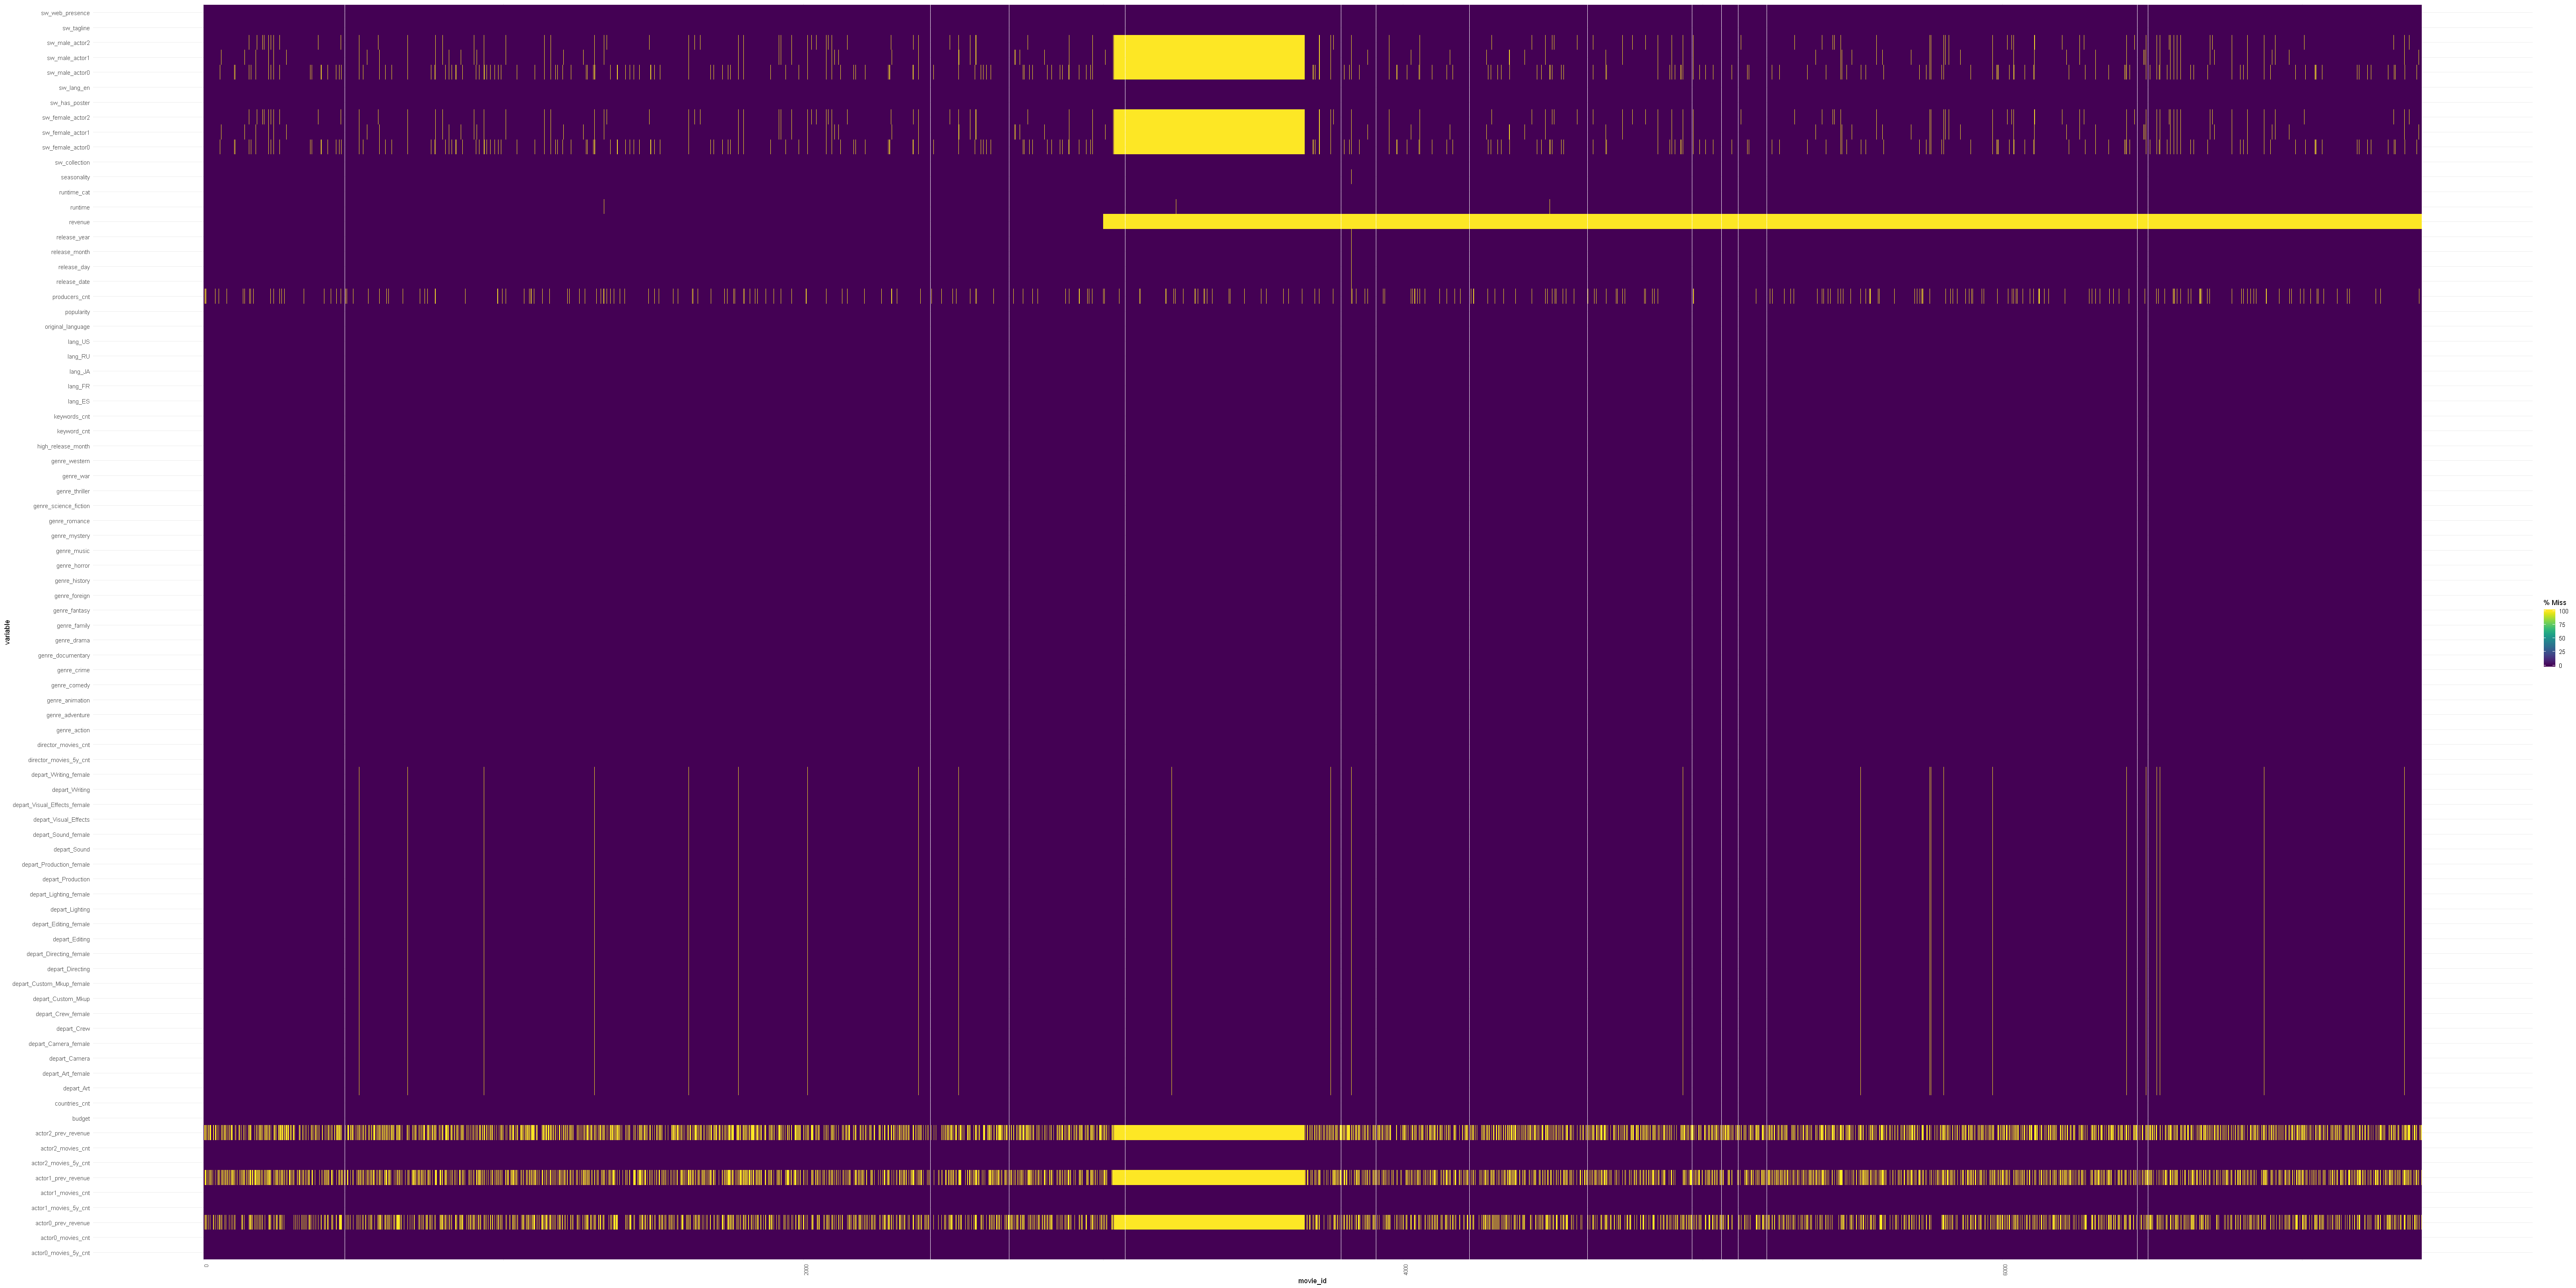

In [230]:
library(naniar)
options(repr.plot.width = 54, repr.plot.height = 27)
gg_miss_fct(x=movies_ff_v, fct=movie_id) + 
theme(axis.text.x = element_text(angle=90, size=8))

In [182]:
options(repr.plot.width = 100, repr.plot.height = 100)
vis_miss(movies_ff_v)

In [200]:
dt <- movies_ff_v['revenue']
head(dt)

,revenue
,<int>
1,12314651
2,95149435
3,13092000
4,16000000
5,3923970
6,3261638


In [201]:
outlierremover <- function(x) {
    id <- c(1:length(x))
    outliers <- identify(id,x)
    x1<- x[-outliers]
    qqnorm(x1)
    qqline(x1)
    return(x1)
    }

In [204]:
outlierremover(dt$revenue)

ERROR: Error in identify.default(id, x): plot.new has not been called yet


In [216]:
movies.cor <- movies_ff_v %>% select(budget,popularity,runtime,revenue,actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,
                 keyword_cnt,actor0_movies_cnt,actor0_movies_5y_cnt)

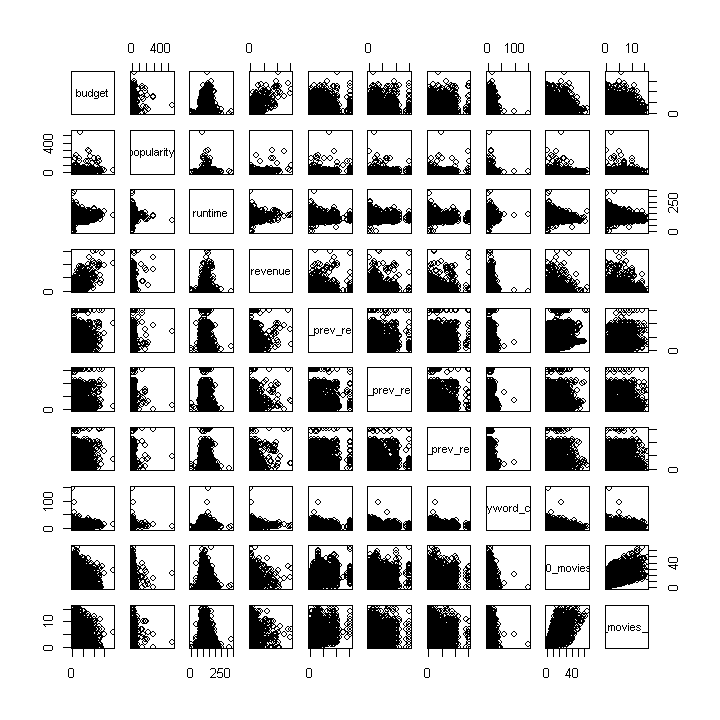

In [223]:
options(repr.plot.width = 6, repr.plot.height = 6)
pairs(movies.cor)

In [225]:
options(repr.plot.width = 3, repr.plot.height = 3)
library("Hmisc")
res2 <- rcorr(as.matrix(movies.cor))
res2


                     budget popularity runtime revenue actor0_prev_revenue
budget                 1.00       0.34    0.22    0.75                0.30
popularity             0.34       1.00    0.11    0.46                0.18
runtime                0.22       0.11    1.00    0.22                0.03
revenue                0.75       0.46    0.22    1.00                0.26
actor0_prev_revenue    0.30       0.18    0.03    0.26                1.00
actor1_prev_revenue    0.24       0.13    0.04    0.20                0.31
actor2_prev_revenue    0.29       0.17    0.06    0.25                0.34
keyword_cnt            0.20       0.18    0.14    0.19                0.06
actor0_movies_cnt      0.32       0.17    0.06    0.22                0.48
actor0_movies_5y_cnt   0.30       0.15    0.05    0.20                0.42
                     actor1_prev_revenue actor2_prev_revenue keyword_cnt
budget                              0.24                0.29        0.20
popularity                   

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Guy\AppData\Local\Temp\RtmpOAvxlc\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.2"
corrplot 0.84 loaded



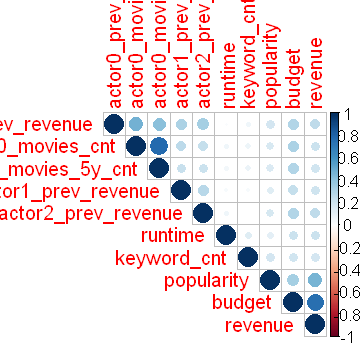

In [228]:
#install.packages("corrplot")
library(corrplot)
# Insignificant correlation are crossed
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.05, insig = "blank")